In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
segment_id = 864691135567721964

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = f'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/{segment_id}_synapses.csv'
synapse_filepath

'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135567721964_synapses.csv'

In [7]:
from python_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691135567721964,864691131808917685,126350506,postsyn,159015,163866,21373,4248
1,864691135567721964,864691131817266592,133926944,postsyn,162210,185292,22676,3708
2,864691135567721964,864691132002312394,133375145,postsyn,161962,212462,22829,7716
3,864691135567721964,864691132049643177,73532781,postsyn,128892,207884,23301,11496
4,864691135567721964,864691132146704984,167829877,postsyn,180030,206188,22035,5436
...,...,...,...,...,...,...,...,...
6348,864691135567721964,864691137197144897,82142719,presyn,121331,188683,24233,1504
6349,864691135567721964,864691137197151297,104203877,presyn,142890,172428,24107,4528
6350,864691135567721964,864691137197151297,104205943,presyn,144197,172298,24104,4228
6351,864691135567721964,864691137197153345,147748365,postsyn,170630,207400,22377,7020


In [35]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(451453, 3), faces.shape=(899885, 3))>

In [10]:
from python_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 5776 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_80037.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_80037_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25686596.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [16]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [17]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [18]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [19]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9025 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93289.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93289_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_554668.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93289.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_93289_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_554668.mls is being deleted....
There were 1 tota

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.846587]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7771 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_606001.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_606001_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_489307.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_606001.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_606001_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_489307.mls is being deleted....
Inside sphere validater: ratio_val = 2.382242620807811
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(2

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2045, 3), faces.shape=(4086, 3))>
xvfb-run -n 5003 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25668948.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max =

  0%|          | 0/4 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(1777, 3), faces.shape=(3550, 3))>
xvfb-run -n 7282 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25668948.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 7

  0%|          | 0/6 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(1773, 3), faces.shape=(3542, 3))>
xvfb-run -n 4814 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25668948.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 7

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.587199]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_293046.mls is being deleted....
Inside sphere validater: ratio_val = 108.49296057185164
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(706, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/351_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 150.6941728591919
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 2505 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_7293.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_7293_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_290335.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_7293.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_7293_fill_holes.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_290335.mls is being deleted....
xvfb-run -n 1026 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/N

  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 60920.9840611568, after = 330805.80253342,

ratio = 5.430079760388205, difference = 269884.81847226317
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Not need to do a second pass because already found a soma


In [20]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [21]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [22]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':150.69417238235474,
    'soma_sdfs':array([0.846587]),
  },
}



# Step 2b: Saving off pipeline products

In [23]:
from python_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/products_up_to_soma_stage.pkl
File size is 16.487588 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140220725014640
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140220482657056


# Step 3: Decomposition

In [24]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
soma_mesh_list_centers = [array([607290.85387328, 771034.57102043, 909995.31979156])]
Getting Glia and Nuclei Pieces Subtracted Away 0.35569334030151367
 Splitting mesh after soma cancellation 1.243182897567749
# of split_meshes = 4
 Containing Mesh Indices 0.04088091850280762
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.6450881958007812e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.772383451461792
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

--

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/166759 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.82s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.001685619354248
branches_touching_root = [7]
combining close nodes
combine_threshold = 700
length of Graph = 36933
After combining close endpoints max(kept_branches_idx) = 136, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.009613302211420458


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Decomposing first pass: 19.21671772003174
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [142]
mesh_large_connectivity: 0.00016379356384277344
Finding MAP candidates connected components: 8.273124694824219e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4543533325195312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05042219161987305
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [606963.3196656  761263.13124606 911832.19073545]
current_skeleton.shape = (318, 2, 3)
node_for_stitch = 318: [606963.3196656  761263.13124606 911832.19073545]
node_for_stitch AFTER = 318: [606963.3196656  761263.13124606 91

  0%|          | 0/134 [00:00<?, ?it/s]

332471 332472
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610836.9 779075.4 906316.1]
Time for preparing soma vertices and root: 0.0002949237823486328
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/71107 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.180487871170044
connecting at the root
branches_touching_root = [12]
combining close nodes
combine_threshold = 700
length of Graph = 8858
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.0034268549791638754


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Decomposing first pass: 6.393236875534058
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6900, 5358, 1969, 9756, 5274]
mesh_large_connectivity: 0.028776168823242188
Finding MAP candidates connected components: 9.012222290039062e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.25995397567749023
Grouping MP Sublimbs by Graph: 0.08926844596862793
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01136159896850586
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6748 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_p

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.061131954193115234
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.154497385025024
Checking connected components after removing cycles
Total time for mesh KDTree = 0.22510552406311035
sbv[0].reshape(-1,3) = [[610836.9 779075.4 906316.1]]
closest_sk_pt_coord BEFORE = [609905. 779360. 907012.]
current_skeleton.shape = (1094, 2, 3)
node_for_stitch = 149: [609905. 779360. 907012.]
node_for_stitch AFTER = 149: [609905. 779360. 907012.]
possible_node_loc = [   0  188  222  533  613  664  732  863 1055 1094]
possible_node_loc AFTER = [   0  188  222  533  613  664  732  863 1055 1094]
curr_shortest_path = [149, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 173.0, 177.0, 181.0, 183.0, 186.0, 188]
Current stitch point was not a branch 

  0%|          | 0/7 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1062, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 20.492640495300293
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7998 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_63718.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_63718_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_885389.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_63718.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neur

0it [00:00, ?it/s]

Total time for decomposition = 7.696892023086548
mesh_correspondence_first_pass: 7.697155714035034
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1062, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1062, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.04214376046758041
 conflict_indices % = 0.017978603411149468


  0%|          | 0/40 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 29.980971097946167
correspondence_1_to_1: 1.7798888683319092
Total time for MAP sublimb processing 29.981188774108887
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.025101184844970703
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.03859853744506836
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.06292605400085449
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.04723525047302246
Do Not Need to Fix MP Decomposition 3 so just continuing
Successful mesh connectivity with typ

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08818349460249052
 conflict_indices % = 0.0055943476369061185


  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [636853.01257571 785085.62792771 883118.75733574]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03442636356202469
 conflict_indices % = 0.007196009485648867


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07402479165207648
 conflict_indices % = 0.005532600322151411


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [601813.99441567 798147.85467095 910184.83951148]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04742568188783328
 conflict_indices % = 0.009998467667790377


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [613686.55938768 782177.87252093 905912.75140531]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07030264817150063
 conflict_indices % = 0.018600252206809584


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10449761715647339
 conflict_indices % = 0.011169579030976966


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 68.35703611373901
Number of matching vertices = 52
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

141820 141821
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [607542.6 762831.9 914440.2]
Time for preparing soma vertices and root: 0.0002155303955078125
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62628 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7290942668914795
connecting at the root
branches_touching_root = [10]
combining close nodes
combine_threshold = 700
length of Graph = 7808
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003281260003841475


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 5.768378257751465
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4234, 2478, 12102, 20217, 18385]
mesh_large_connectivity: 0.07264184951782227
Finding MAP candidates connected components: 0.0001823902130126953
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.18311309814453125
Grouping MP Sublimbs by Graph: 0.043601036071777344
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.030666112899780273
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1102 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neur

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.08033871650695801
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 39.25092339515686
Checking connected components after removing cycles
Total time for mesh KDTree = 0.22930073738098145
sbv[0].reshape(-1,3) = [[607542.6 762831.9 914440.2]]
closest_sk_pt_coord BEFORE = [608055. 762765. 915032.]
current_skeleton.shape = (2625, 2, 3)
node_for_stitch = 928: [608055. 762765. 915032.]
node_for_stitch AFTER = 928: [608055. 762765. 915032.]
possible_node_loc = [  70  124  126  194  198  327  500  525  566  589  928 1285 1345 1664
 1757 1838 1872 2251 2439 2468 2480 2507 2569 2625]
possible_node_loc AFTER = [  70  124  126  194  198  327  500  525  566  589  928 1285 1345 1664
 1757 1838 1872 2251 2439 2468 2480 2507 2569 2625]
curr_shortest_path = [928]
Current stitch point was a branch or endpoint
change_status for create soma extending

  0%|          | 0/20 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2498, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 45.07196617126465
Working on limb correspondence for #0 MAP piece
xvfb-run -n 729 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_38022.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_38022_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_807250.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_38022.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 9.597561359405518
mesh_correspondence_first_pass: 9.59763240814209
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2498, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2498, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.06040128187264874
 conflict_indices % = 0.019576424689981886


  0%|          | 0/72 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 59.02808380126953
correspondence_1_to_1: 4.327715873718262
Total time for MAP sublimb processing 59.0281445980072
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.007416725158691406
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023488521575927734
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024003982543945312
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [638960.43191541 756081.88315311 949436.48435953]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_wit

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06210651693040667
 conflict_indices % = 0.0064020758890590435


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [613101.64672925 779430.00572369 978255.72967205]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07309941520467836
 conflict_indices % = 0.004159459682069023


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [619621.55666018 680458.4761976  936121.64033632]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08837726019000919
 conflict_indices % = 0.0069721115537848604


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 86.61995506286621
Number of matching vertices = 27
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

124951 124952
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [612977.6 770342.8 904385.2]
Time for preparing soma vertices and root: 0.00024318695068359375
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50407 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.0167226791381836
connecting at the root
branches_touching_root = [18]
combining close nodes
combine_threshold = 700
length of Graph = 7941
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.0052689134108758326


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Decomposing first pass: 6.625483989715576
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13212, 375, 1475, 1118, 9471, 6179]
mesh_large_connectivity: 0.035398006439208984
Finding MAP candidates connected components: 0.00010275840759277344
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.22565960884094238
Grouping MP Sublimbs by Graph: 0.04746270179748535
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0034704208374023438
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1563 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproo

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.07459902763366699
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.139107704162598
Checking connected components after removing cycles
Total time for mesh KDTree = 0.17836666107177734
sbv[0].reshape(-1,3) = [[612977.6 770342.8 904385.2]]
closest_sk_pt_coord BEFORE = [612671. 770023. 904133.]
current_skeleton.shape = (1328, 2, 3)
node_for_stitch = 0: [612671. 770023. 904133.]
node_for_stitch AFTER = 0: [612671. 770023. 904133.]
possible_node_loc = [   0   34  108  223  365  437  457  739 1090 1105 1147 1175 1230 1262
 1328]
possible_node_loc AFTER = [   0   34  108  223  365  437  457  739 1090 1105 1147 1175 1230 1262
 1328]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [612671. 770023. 904133.]
skipping soma 0 because c

  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1252, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 23.640090465545654
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5164 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_16762.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_16762_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_24950.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_16762.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 5.5184326171875
mesh_correspondence_first_pass: 5.518505096435547
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1252, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1252, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.05689601005340873
 conflict_indices % = 0.023751178133836003


  0%|          | 0/36 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 31.486685276031494
correspondence_1_to_1: 2.3245840072631836
Total time for MAP sublimb processing 31.48676109313965
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01571941375732422
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02765369415283203
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [627667.0685465  752448.21024514 890230.26052172]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.056794191854178465
 conflict_indices % = 0.009731733690335205


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [4]
conn = [4]
winning_vertex = [629663.72297337 762149.95797074 895035.22026077]
MP_branches_with_stitch_point = [4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10685112959010964
 conflict_indices % = 0.002943557288983737


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09869773817683344
 conflict_indices % = 0.013147236587949404


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [4]
MP_branches_for_correspondence = [4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 47.86258673667908
Number of matching vertices = 28
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/19 [00:00<?, ?it/s]

100589 100590
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [600586.1 766173.1 909408.5]
Time for preparing soma vertices and root: 0.00019288063049316406
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/37990 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5691337585449219
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5157
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.005621387664616928


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 3.6895031929016113
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2986, 1362, 4767]
mesh_large_connectivity: 0.00496363639831543
Finding MAP candidates connected components: 9.799003601074219e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.13239479064941406
Grouping MP Sublimbs by Graph: 0.044248104095458984
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013616323471069336
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 667 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/tem

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02784895896911621
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.122111082077026
Checking connected components after removing cycles
Total time for mesh KDTree = 0.09345221519470215
sbv[0].reshape(-1,3) = [[600586.1 766173.1 909408.5]]
closest_sk_pt_coord BEFORE = [600252. 766324. 909647.]
current_skeleton.shape = (365, 2, 3)
node_for_stitch = 365: [600252. 766324. 909647.]
node_for_stitch AFTER = 365: [600252. 766324. 909647.]
possible_node_loc = [  0 104 365]
possible_node_loc AFTER = [  0 104 365]
curr_shortest_path = [365]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [600252. 766324. 909647.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[600252., 766324., 909647.]])}
    Total time fo

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (364, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.530732870101929
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1097 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88095.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88095_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_597323.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88095.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 1.797908067703247
mesh_correspondence_first_pass: 1.797933578491211
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (364, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (364, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.027537026878771256
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.76604962348938
correspondence_1_to_1: 0.4237697124481201
Total time for MAP sublimb processing 13.766136169433594
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.015625476837158203
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.011023283004760742
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0023152828216552734
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [2]
conn = [2]
winning_vertex = [588932.63554664 766332.0624331  905632.93879231]
MP_branches_with_stitch_point = [2]
MAP_branches_with_sti

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03247394404827208
 conflict_indices % = 0.0024136039495337358


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05851063829787234
 conflict_indices % = 0.0023083099156965075


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [585324.42156918 761913.547466   900224.52736136]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04117181314330958
 conflict_indices % = 0.005700712589073635


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06149080603703948
 conflict_indices % = 0.011533645290977394


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [575389.03340603 737674.04893041 895030.74819376]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06988986855278881
 conflict_indices % = 0.009430610728934535


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 28.41295862197876
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

75781 75782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610476.4 763192.8 908818.7]
Time for preparing soma vertices and root: 0.0002269744873046875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27114 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.38793468475341797
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 3511
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003035182203468251


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 1.9174609184265137
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [963, 2847]
mesh_large_connectivity: 0.0019826889038085938
Finding MAP candidates connected components: 9.036064147949219e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.11700558662414551
Grouping MP Sublimbs by Graph: 0.032550811767578125
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012999534606933594
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2506 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/po

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.013352155685424805
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.492478132247925
Checking connected components after removing cycles
Total time for mesh KDTree = 0.020659446716308594
sbv[0].reshape(-1,3) = [[610476.4 763192.8 908818.7]]
closest_sk_pt_coord BEFORE = [610854. 763065. 909083.]
current_skeleton.shape = (135, 2, 3)
node_for_stitch = 0: [610854. 763065. 909083.]
node_for_stitch AFTER = 0: [610854. 763065. 909083.]
possible_node_loc = [  0 135]
possible_node_loc AFTER = [  0 135]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [610854. 763065. 909083.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[610854., 763065., 909083.]])}
    Total time for Fixing Skel

0it [00:00, ?it/s]

Total time for decomposition = 1.2593374252319336
mesh_correspondence_first_pass: 1.2593796253204346
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (135, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (135, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.01916010498687664
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.235639333724976
correspondence_1_to_1: 0.26690006256103516
Total time for MAP sublimb processing 10.235722780227661
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.013988018035888672
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.015243053436279297
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [625541.26641918 751740.4911113  912025.85771601]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08041923983557694
 conflict_indices % = 0.005259979349710701


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [620994.00848407 753206.95466875 910936.33342788]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.0493513100992114
 conflict_indices % = 0.014245738997710507


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05608322026232474
 conflict_indices % = 0.01522689582391075


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 24.29861068725586
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

54032 54033
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [602191.8 777465.4 910208.8]
Time for preparing soma vertices and root: 0.00021386146545410156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14121 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 19.13it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.272167444229126
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1591
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.868537187576294
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28180]
mesh_large_connectivity: 0.00015616416931152344
Finding MAP candidates connected components: 7.987022399902344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.012881994247436523
Grouping MP Sublimbs by Graph: 3.0040740966796875e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.007953882217407227
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9506 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poiss

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03742027282714844
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.11097002029419
Checking connected components after removing cycles
Total time for mesh KDTree = 0.13135576248168945
sbv[0].reshape(-1,3) = [[602191.8 777465.4 910208.8]]
closest_sk_pt_coord BEFORE = [601878. 777426. 910097.]
current_skeleton.shape = (1254, 2, 3)
node_for_stitch = 1254: [601878. 777426. 910097.]
node_for_stitch AFTER = 1254: [601878. 777426. 910097.]
possible_node_loc = [   0   60   73  129  159  166  167  237  272  291  348  382  419  467
  549  598  708  923 1079 1254]
possible_node_loc AFTER = [   0   60   73  129  159  166  167  237  272  291  348  382  419  467
  549  598  708  923 1079 1254]
curr_shortest_path = [1254]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord A

  0%|          | 0/18 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1154, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 19.530921459197998
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9369 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14769.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14769_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_376480.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14769.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neur

0it [00:00, ?it/s]

Total time for decomposition = 4.274934768676758
mesh_correspondence_first_pass: 4.275009632110596
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1154, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1154, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.05031937544357701
 conflict_indices % = 0.0


  0%|          | 0/35 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 25.887065410614014
correspondence_1_to_1: 2.073129177093506
Total time for MAP sublimb processing 25.887127161026
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 27.077768325805664
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

28179 28180
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 359.1236345767975


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(400, 3), faces.shape=(796, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 66.99it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03531241416931152
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [137.60514933]
width_median= 137.60514932621527
segment_widths_median = [137.60514933]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 71.48it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9504256248474121
branches_touching_root = [1]
combining close nodes
combine_threshold = 1300
length of Graph = 168
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.03391959798994975


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [141.07736562 136.44600902 214.43515964]
width_median= 148.4060048138814
segment_widths_median = [141.07736562 136.44600902 214.43515964]
Using the axon parameters
Decomposing first pass: 0.09610724449157715
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7179718017578125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.0885422229766846
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

795 796
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.300462245941162
Floating 1: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 99.18it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02178215980529785
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.68884604]
width_median= 151.68884604013837
segment_widths_median = [151.68884604]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 74.37it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0601201057434082
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.66920078]
width_median= 151.6692007822733
segment_widths_median = [151.66920078]
Using the axon parameters
Decomposing first pass: 0.03367185592651367
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6464462280273438e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1169734001159668
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.21661758422851562
Floating 2: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 69.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028317928314208984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [316.70236585]
width_median= 316.7023658532379
segment_widths_median = [316.70236585]
Decomposing first pass: 0.037554025650024414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.765655517578125e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06695890426635742


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11428260803222656


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04585744634092741
 conflict_indices % = 0.0030034429712109


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 4
Total time for stitching floating pieces = 7.42329216003418
Total time for Concept Networks = 9.483405351638794
Total time for all mesh and skeletonization decomp = 376.03097128868103
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 497 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_102423.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_102423_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_5529.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_102423.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_102423_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neu

    current_width= 174.34685615552092
Working on limb L0 branch 63
    current_width= 161.28612609903655
Working on limb L0 branch 75
    current_width= 173.9711281629101
Working on limb L0 branch 100
    current_width= 184.79948710093103
Working on limb L0 branch 104
    current_width= 164.92740753027098
Working on limb L0 branch 111
    current_width= 102.14535718362629
Working on limb L0 branch 115
    current_width= 104.13639206365286
Working on limb L0 branch 45
    current_width= 122.99875188727947
Working on limb L0 branch 48
    current_width= 88.27545353735994
Working on limb L0 branch 134
    current_width= 174.2265383924398
Working on limb L0 branch 18
    current_width= 107.42407306696485
Working on limb L0 branch 22
    current_width= 319.01787103738695
Working on limb L0 branch 56
    current_width= 99.71109301223365
Working on limb L0 branch 60
    current_width= 119.24154177617663
Working on limb L0 branch 62
    current_width= 78.81200276863055
Working on limb L0 branc

    current_width= 140.3538223070222
Working on limb L5 branch 3
    current_width= 389.2987417847399
Working on limb L5 branch 2
    current_width= 300.5793449184472
Working on limb L5 branch 4
    current_width= 266.07730160234473
Working on limb L6 branch 0
    current_width= 306.8814946851925
dially_centered_speed_tradeoff AFTER = 0.2
medial centered AFTER 1
AREA VARIATION AFTER 0.0001
MAX ITERATIONS AFTER 500
medial centered END 1
set_medially_centered_speed_tradeoff END = 0.2
quality_speed_tradeoff END = 0.2
Max iterations END = 500
AREA VARIATION END 0.0001
Number of vertices of the skeleton: 1265
Number of edges of the skeleton: 1266

Number of segments: 116



  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 70



  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 44



  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 67



  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 56



  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 75



  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 91



  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 145



  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 93



  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 116



  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 116



  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 179



  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/179 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 43



  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 115



  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 137



  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 95



  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 64



  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 65



  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 85



  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 64



  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 159



  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 111



  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 71



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 47



  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 41



  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 112



  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 171



  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 114



  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 142



  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 122
    No spines and using precomputed width: 268.3987974668497
Working on limb L0 branch 105
    current_width= 254.40528708461596
Working on limb L0 branch 123
    No spines and using precomputed width: 175.92980853069895
Working on limb L0 branch 92
    No spines and using precomputed width: 162.59099336271294
Working on limb L0 branch 106
    No spines and using precomputed width: 177.75531525200904
Working on limb L0 branch 91
    No spines and using precomputed width: 261.2432437076021
Working on limb L0 branch 93
    No spines and using precomputed width: 143.67443926531143
Working on limb L0 branch 78
    No spines and using precomputed width: 173.39493447310736
Working on limb L0 branch 82
    current_width= 191.53630998

    current_width= 177.11512455029217
Working on limb L0 branch 98
    No spines and using precomputed width: 113.04884069060992
Working on limb L0 branch 108
    No spines and using precomputed width: 83.12380816646467
Working on limb L0 branch 112
    No spines and using precomputed width: 85.71487557132254
Working on limb L0 branch 114
    No spines and using precomputed width: 99.46949527625182
Working on limb L0 branch 127
    No spines and using precomputed width: 90.68990103293501
Working on limb L0 branch 35
    No spines and using precomputed width: 73.84748718680041
Working on limb L0 branch 38
    No spines and using precomputed width: 110.77041866496614
Working on limb L0 branch 14
    current_width= 232.20032438829074
Working on limb L0 branch 23
    No spines and using precomputed width: 105.47517414833388
Working on limb L0 branch 124
    No spines and using precomputed width: 96.2188902975276
Working on limb L0 branch 126
    No spines and using precomputed width: 104.0

    current_width= 263.16899449126436
Working on limb L4 branch 5
    current_width= 313.0659544211036
Working on limb L4 branch 3
    current_width= 225.79910580413832
Working on limb L4 branch 6
    No spines and using precomputed width: 192.22606103868372
Working on limb L4 branch 1
    current_width= 242.99401936608882
Working on limb L4 branch 4
    current_width= 273.9742153313514
Working on limb L5 branch 0
    No spines and using precomputed width: 345.1886239135025
Working on limb L5 branch 1
    No spines and using precomputed width: 140.3538223070222
Working on limb L5 branch 3
    No spines and using precomputed width: 389.2987417847399
Working on limb L5 branch 2
    current_width= 281.2288499004053
Working on limb L5 branch 4
    current_width= 261.70270388949746
Working on limb L6 branch 0
    current_width= 299.3178931449883
Total time for neuron instance creation = 772.3836925029755


In [25]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [26]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

[autoreload of neurd.vdi_default failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/neurd_packages/NEURD/neurd/vdi_default.py", line 52
    directory = self.
                    ^
SyntaxError: invalid syntax
]


In [27]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [28]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':150.69417238235474,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Saving off neuron

In [30]:

from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.27319979667663574
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 1.114187240600586
Total time for limb_meshes compression = 1.6050941944122314
    Starting Limb Correspondence Compression


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 33.00073838233948
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140220725014640
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140220482657056
Total time for compression = 74.51599764823914


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135567721964---
saved neuron filepath = 864691135567721964


PosixPath('864691135567721964')

# Reloading the Neuron

In [33]:
# neuron_obj_rec = nru.decompress_neuron(
#     filepath = f"./{segment_id}",
#     original_mesh = mesh_decimated,
#     #pipeline_products = pipeline_products,
# )

from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [34]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':150.69417238235474,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 4A: Multi Soma Split Suggestions

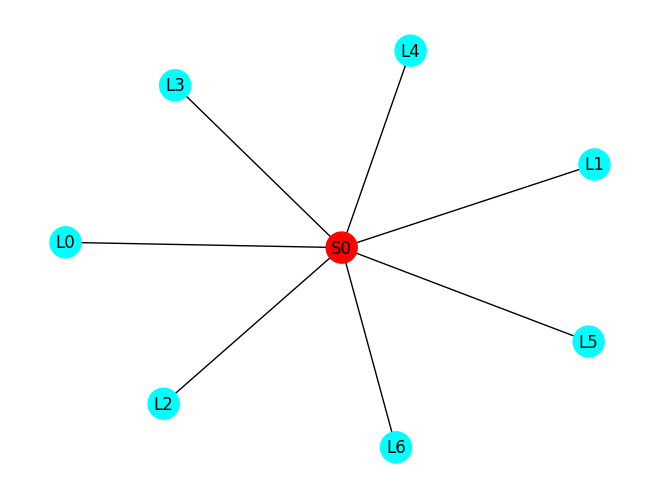

In [36]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [37]:
multi_soma_split_parameters = dict()

In [38]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [39]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


# Step 4B: Multi Soma Split Execution

In [40]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [41]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':150.69417238235474,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 5: Cell Typing

In [42]:
from neurd import neuron_pipeline_utils as npu

In [43]:
nviz.visualize_neuron(
    n1,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [45]:
n1.segment_id

864691135567721964

In [47]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 5


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segme


Number of segments: 3


Number of segments: 5


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segme


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1

branches_without_postsyn_req query = 
skeletal_length > 10000  a

100%|██████████| 1/1 [00:09<00:00,  9.63s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 10.84766936302185
branches_touching_root = [15]
combining close nodes
combine_threshold = 1300
length of Graph = 47118
After combining close endpoints max(kept_branches_idx) = 490, len(kept_branches_idx) = 449
empty_indices % = 0.0
 conflict_indices % = 0.028083451415478307
Decomposing first pass: 54.54147934913635
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.049041748046875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.5735626220703125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.003265857696533203
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [607085.45171222 761489.43217667 911789.29988978]
current_

100%|██████████| 1/1 [00:00<00:00, 442.72it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.010936737060546875
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.015224218368530273
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.3909759521484375e-06
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.5020370483398438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.027017593383789062
Removed 0 skeletal branches
119 120
For marked faces: None
empty_indices % = 0.0


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.07931828498840332
concept_network_dict = {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f85f1537d60>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [607212.4 761727.8 911846.2]---------
Starting_edge inside branches_to_conept = [[606459.1 760534.7 912002.4]
 [607212.4 761727.8 911846.2]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [435]
printing out current edge:
[[607212.4 761727.8 911846.2]
 [606459.1 760534.7 912002.4]]
edge_endpoints_to_process was empty so exiting loop after 450 iterations
starting_node in concept map (that should match the starting edge) = 440
Total time for branches to concept conversion = 2.368152618408203

Done generating concept network 



Number of segments: 8


Number of segments: 8


Number of segments: 24


Number of segments: 2


Number of segments: 2


Number of segments: 5


Number of segments: 5


Number of segmen


Number of segments: 22


Number of segments: 13


Number of segments: 46


Number of segments: 83


Number of segments: 37


Number of segments: 43


Number of segments: 65


Number of segments: 26


Number of segments: 26


Number of segments: 12


Number of segments: 15


Number of segments: 15


Number of segments: 28


Number of segments: 12


Number of segments: 16


Number of segments: 53


Number of segments: 43


Number of segments: 84


Number of segments: 8


Number of segments: 10


Number of segments: 41


Number of segments: 31


Number of segments: 33


Number of segments: 22


Number of segments: 45


Number of segments: 32


Number of segments: 26


Number of segments: 32


Number of segments: 29


Number of segments: 23


Number of segments: 73


Number of segments: 58


Number of segments: 18


Number of segments: 15


Number of segments: 11


Number of segments: 16


Number of segments: 62


Number of segments: 36


Number of segments: 23


Number of segments: 46




In [48]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 1.4696608011293926
syn_density_head = 0.10277791918107558
syn_density_neck = 0.007613179198598192
syn_density_shaft = 1.3170800013574873
sk_length_synapse_density = 3152428.095271828
About to do spine_density stats
postsyn_limb_branch = {'L1': array([ 0,  1,  8, 10, 11, 12, 14]), 'L2': array([ 0,  4,  8,  9, 12, 13, 14]), 'L3': array([ 0, 11, 12]), 'L4': array([0, 1, 2, 4]), 'L5': array([2, 4]), 'L6': array([0])}
sk_length = 2615809.6719965185
# of spines = 267
Density = 0.10207164644215574
spine_density = 0.10207164644215574 (multiplier = 1000)
sk_length spine density = 2615809.6719965185
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = inhibitory, pred_class_label = inhibitory
Total time for e/i calculations = 0.18799686431884766
baylor_e_i = inhibitory

*****Using v7 INHIBITORY Filters!!!


Curre

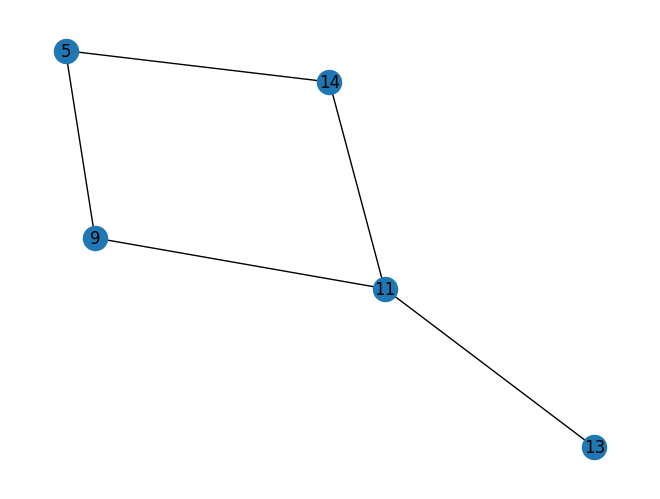

Performing global features query
Done with edge_df: 0.0007390975952148438
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   28.400475               0.279900              0.000228   
1   9   5     62.37   29.127088               0.223036              0.000341   
2  11  13     27.84   31.107051               0.425739              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   53.799367               0.411960              0.000195   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                1                       None                          None  
3       

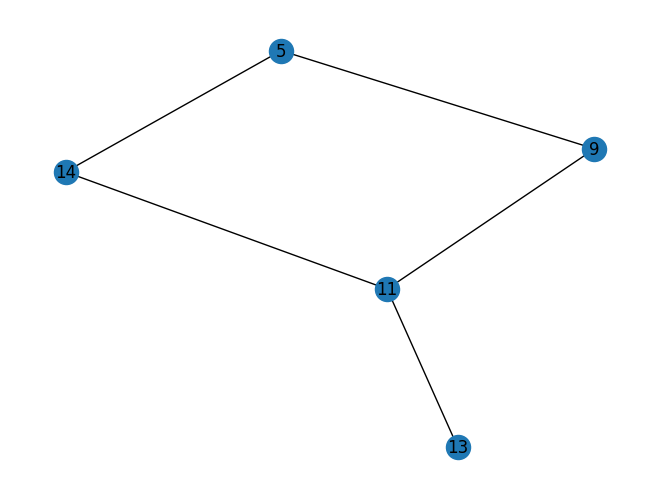

Performing node features query
Done with edge_df: 0.0007731914520263672
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   28.400475               0.279900              0.000228   
1   9   5     62.37   29.127088               0.223036              0.000341   
2  11  13     27.84   31.107051               0.425739              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   53.799367               0.411960              0.000195   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                1                       None                          None   
3       

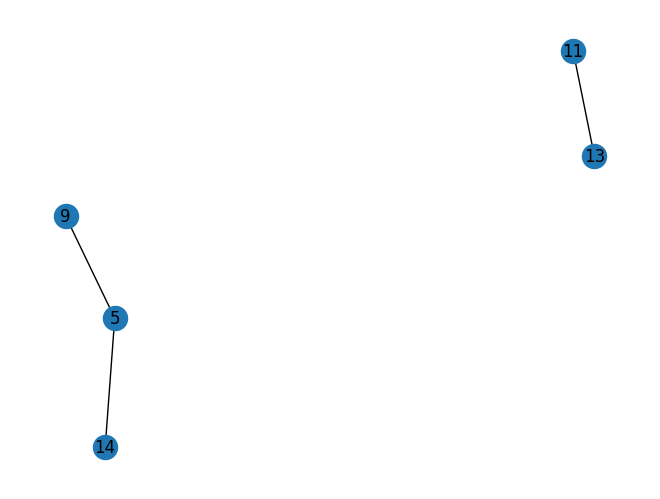

for upstream node 5, winning_node = None, error_branches = [ 9 11 13 14]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1416.1387183416539 but max skip distance was 1416.1387183416539
Current node skip distance was 1589.4434432659746 but max skip distance was 1589.4434432659746
Current node skip distance was 1546.9734240260361 but max skip distance was 1546.9734240260361
Current node skip distance was 1471.108130620547 but max skip distance was 1703.737860366174
Current node skip distance was 1341.4954171802704 but max skip distance was 1341.4954171802704
Current node skip distance was 1486.6422825420861 but max skip distance was 1486.6422825420861
Current node skip distance was 1817.724537011968 but max skip distance was 2300.0
Current node skip distance was 1501.0959360356467 but max skip distance was 1501.0959360356467
Current node skip distan

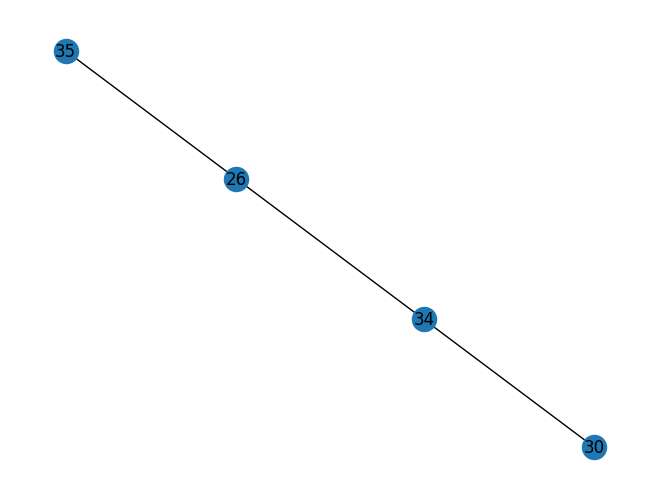

Performing global features query
Done with edge_df: 0.0005805492401123047
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  34     59.58   15.389591               0.196140              0.000283   
1  26  35     25.87   28.455030               0.266141              0.000099   
2  30  34     49.14    0.391945               0.004159              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       True                          None  
1                2                      False                          None  
2                3                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   28.455030               0.266141              

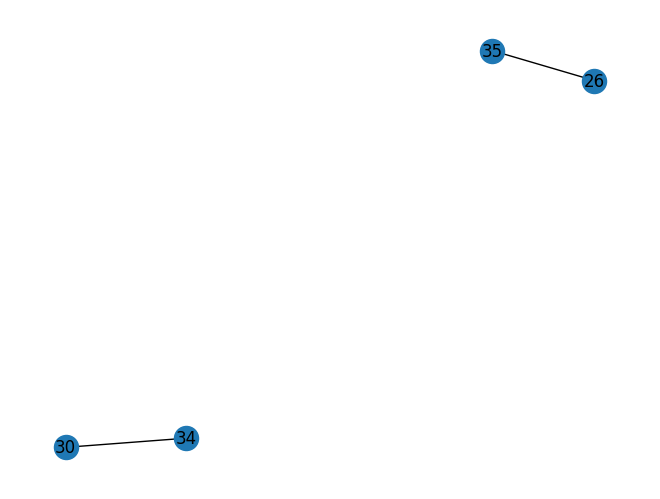

Performing node features query
Done with edge_df: 0.000629425048828125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   28.455030               0.266141              0.000099   
1  30  34     49.14    0.391945               0.004159              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                      False                          None   
1                3                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   28.455030               0.266141              0.000099   
1  30  34     49.14    0.391945               0.004159              

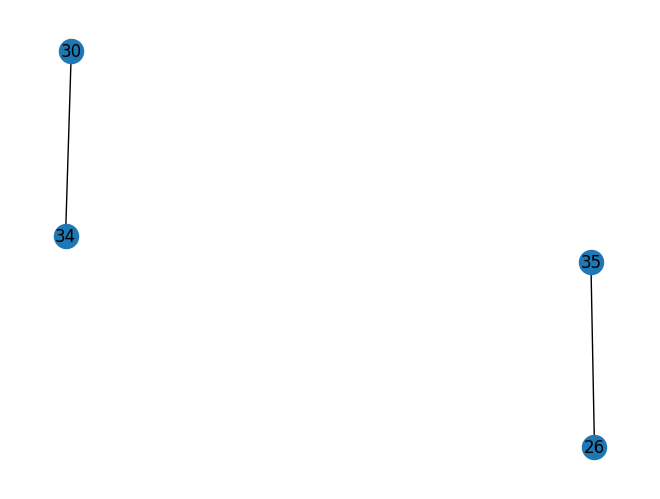

for upstream node 35, winning_node = 26, error_branches = [30 34]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (82.42468808628384) less than width_min(250)
Current node skip distance was 1658.4257362891685 but max skip distance was 1658.4257362891685
Current node skip distance was 1623.6893897676364 but max skip distance was 1687.839175191355
Current node skip distance was 1465.4945829272474 but max skip distance was 1465.4945829272474
Current node skip distance was 1459.2027656924593 but max skip distance was 1459.2027656924593
Current node skip distance was 1481.2995057656967 but max skip distance was 1896.7357698793417
Current node skip distance was 1811.1869040596193 but max skip distance was 1811.1869040596193
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012538433074951172
Performing Edge Query
After edge filter, # of r

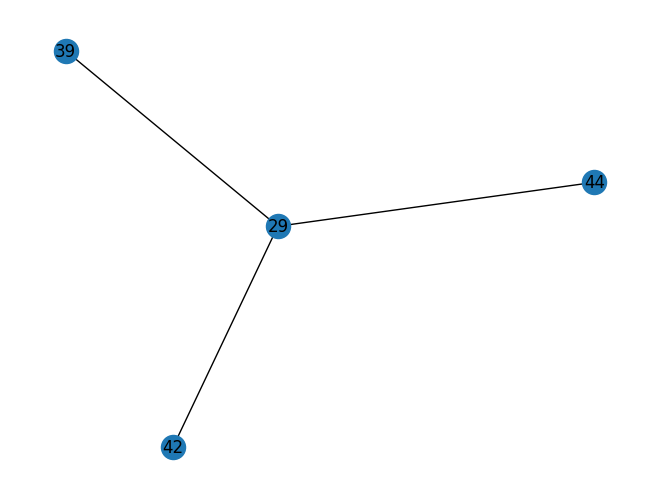

Performing global features query
Done with edge_df: 0.0006041526794433594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    8.376425               0.066270              0.000000   
1  29  42     38.61   56.189938               0.444546              0.000033   
2  29  44     33.11   28.286256               0.182864              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                       None                          None  
2                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    8.376425               0.066270              

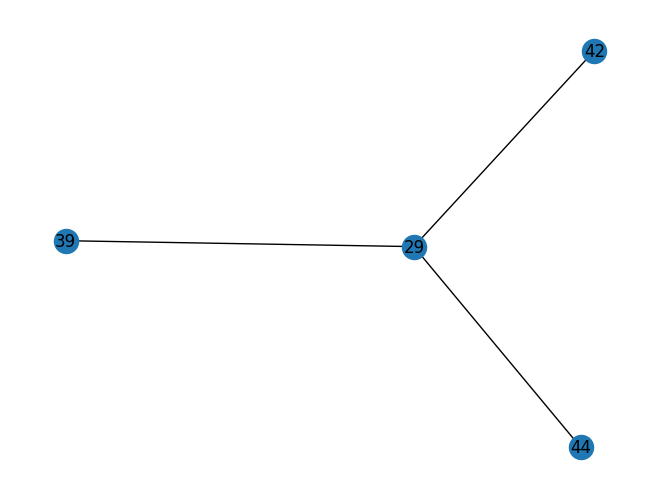

Performing node features query
Done with edge_df: 0.0007183551788330078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    8.376425               0.066270              0.000000   
1  29  42     38.61   56.189938               0.444546              0.000033   
2  29  44     33.11   28.286256               0.182864              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                       None                          None   
2                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

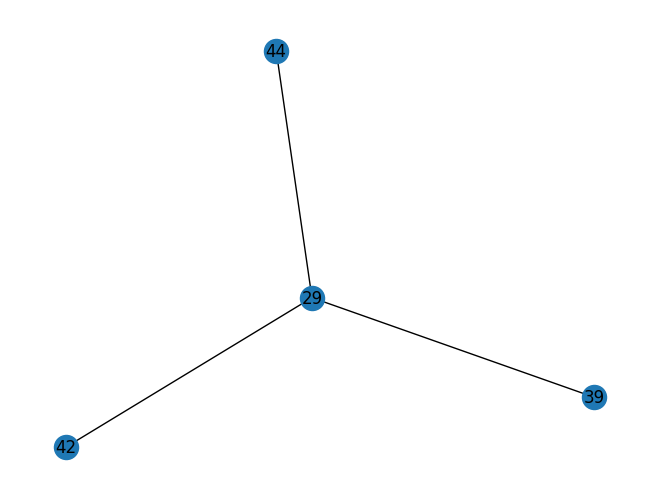

for upstream node 44, winning_node = None, error_branches = [29 39 42]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.2364002485333 but max skip distance was 1407.2364002485333
Current node skip distance was 1437.4230453052987 but max skip distance was 1437.4230453052987
Current node skip distance was 1697.3244725786685 but max skip distance was 1871.4636611558908
Current node skip distance was 1533.0819962936434 but max skip distance was 1533.0819962936434
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1759.9527762328148 but max skip distance was 1759.9527762328148
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1983.9878891513208 but max skip distance was 2016.3691093054942
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1490.7851567970627 but max skip 

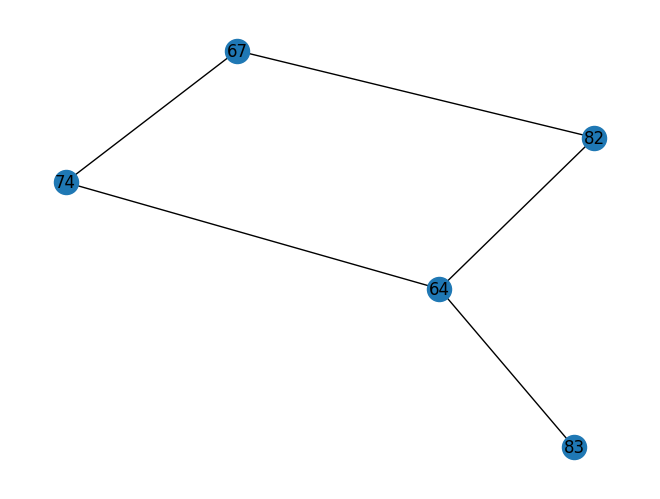

Performing global features query
Done with edge_df: 0.000629425048828125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   17.745284               0.309863              0.000162   
1  64  83     32.69   13.288774               0.232045              0.000251   
2  64  74     36.69    8.332757               0.127022              0.000251   
3  67  82     25.44    2.315632               0.029945              0.000015   
4  67  74     26.27   11.728159               0.178781              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                4                       None                          None  
1                2                       None                          None  
2                2                       None                          None  
3        

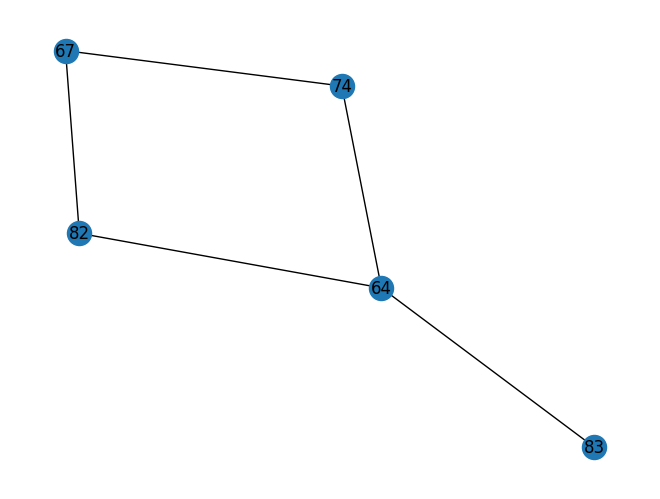

Performing node features query
Done with edge_df: 0.0006616115570068359
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   17.745284               0.309863              0.000162   
1  64  83     32.69   13.288774               0.232045              0.000251   
2  64  74     36.69    8.332757               0.127022              0.000251   
3  67  82     25.44    2.315632               0.029945              0.000015   
4  67  74     26.27   11.728159               0.178781              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                4                       None                          None   
1                2                       None                          None   
2                2                       None                          None   
3       

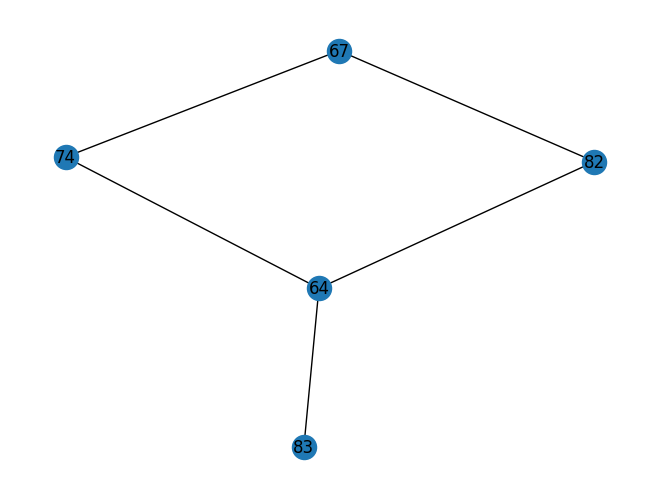

for upstream node 74, winning_node = None, error_branches = [64 67 82 83]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1651.3403474215402 but max skip distance was 1715.708392446817
Current node skip distance was 1477.6014975110577 but max skip distance was 1778.146505017868
Current node skip distance was 1436.6213580418726 but max skip distance was 1519.4828706434616
Current node skip distance was 1944.1748357661763 but max skip distance was 2300.0
Current node skip distance was 1987.1789589522543 but max skip distance was 1987.1789589522543
Current node skip distance was 1479.2224909363317 but max skip distance was 1479.2224909363317
Current node skip distance was 1428.0660627033628 but max skip distance was 1909.3250948129576
Current node skip distance was 2022.2342643793472 but max skip distance was 2224.2091377721404
Current node skip distance was 1758.4378551092561 but max skip distance was 2300.0
Current 

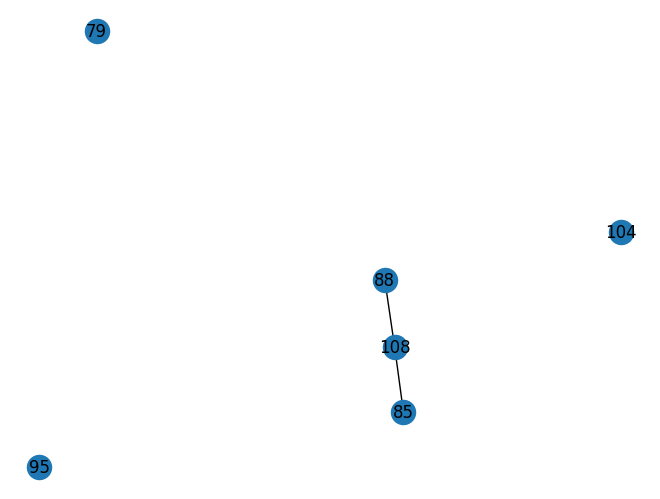

Performing global features query
Done with edge_df: 0.0005934238433837891
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   58.457396               0.382276              0.000253   
1  88  108     17.56   90.253251               0.590201              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                3                        True                          None  
1                1                       False                          None  
Afer Global query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.253251               0.590201              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                1                       False            

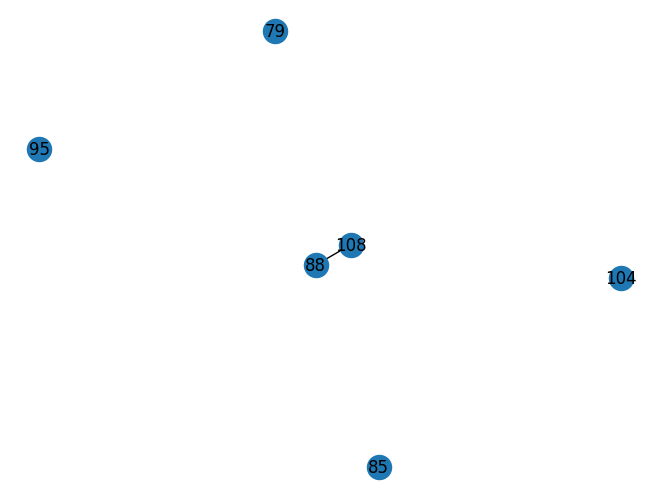

Performing node features query
Done with edge_df: 0.0006074905395507812
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.253251               0.590201              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  108     17.56   90.253251               0.590201              0.000482   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   

  above_threshold_delete  
0                   None  


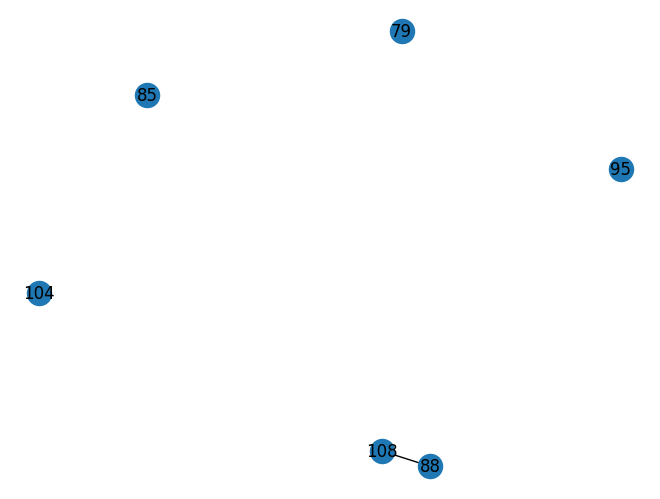

for upstream node 108, winning_node = 88, error_branches = [ 79  85  95 104]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1485.633711096742 but max skip distance was 1485.633711096742
Current node skip distance was 1458.786587331158 but max skip distance was 1458.786587331158
Current node skip distance was 1770.8640452267325 but max skip distance was 1803.8310592164503
Current node skip distance was 1772.329672081923 but max skip distance was 2300.0
Current node skip distance was 1508.868557422813 but max skip distance was 1508.868557422813
Current node skip distance was 1415.8713792578053 but max skip distance was 2019.9581746918711
Current node skip distance was 1960.9148168013344 but max skip distance was 1960.9148168013344
Current node skip distance was 2155.047584699417 but max skip distance was 2155.047584699417
Current node skip distance was 1633.992796575827 but max skip distance was 1633.9

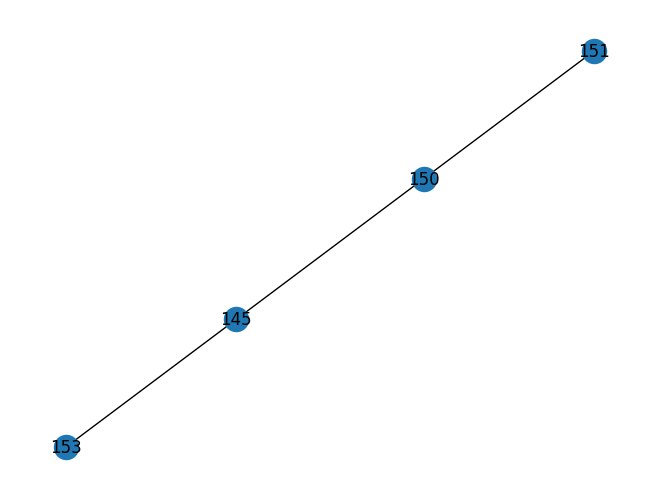

Performing global features query
Done with edge_df: 0.0006041526794433594
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   65.473880               0.781457   
1  145  153     26.01   36.660981               0.437564   
2  150  151     28.18   65.777051               0.787927   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000046                0                       True   
1              0.000035                2                      False   
2              0.000037                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

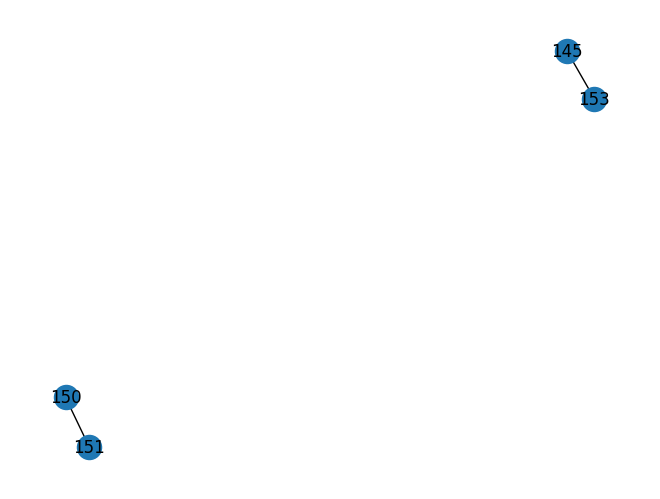

Performing node features query
Done with edge_df: 0.0006277561187744141
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  151     28.18   65.777051               0.787927   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000035                2                      False   
1              0.000037                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  151     28.18   65.777051               0.787927   

   synapse_density_diff  n_synapses_diff

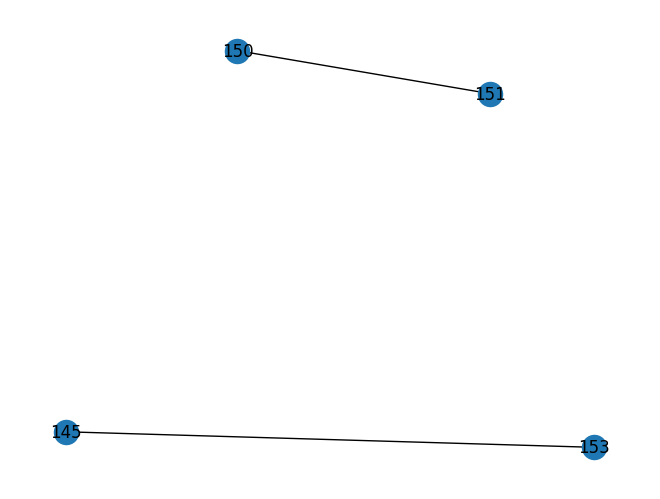

for upstream node 151, winning_node = 150, error_branches = [145 153]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (149.2582006666952) less than width_min(250)
Current node skip distance was 1476.7236141240276 but max skip distance was 1792.7934573952325
Current node skip distance was 1668.5220917782256 but max skip distance was 1668.5220917782256
Current node skip distance was 1689.1239377341744 but max skip distance was 2047.7133432665414
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008096694946289062
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   65.473880               0.781457   
1  145  153     26.01   36.660981               0.437564   
2  145  154    120.63  

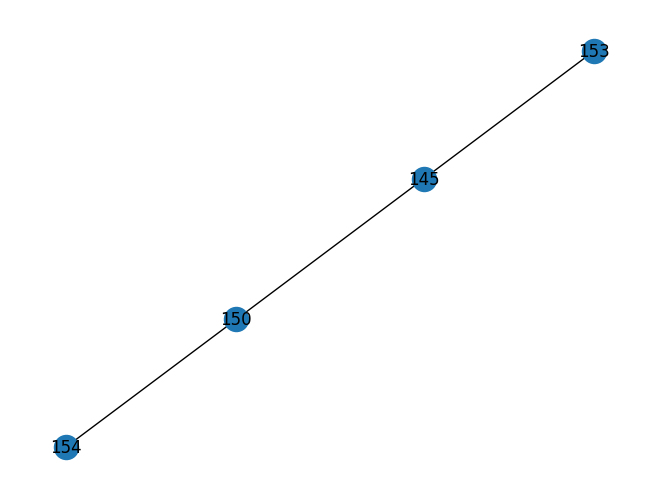

Performing global features query
Done with edge_df: 0.0006735324859619141
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   65.473880               0.781457   
1  145  153     26.01   36.660981               0.437564   
2  150  154      8.79   71.195089               0.912020   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000046                0                        True   
1              0.000035                2                       False   
2              0.000029                1                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.43756

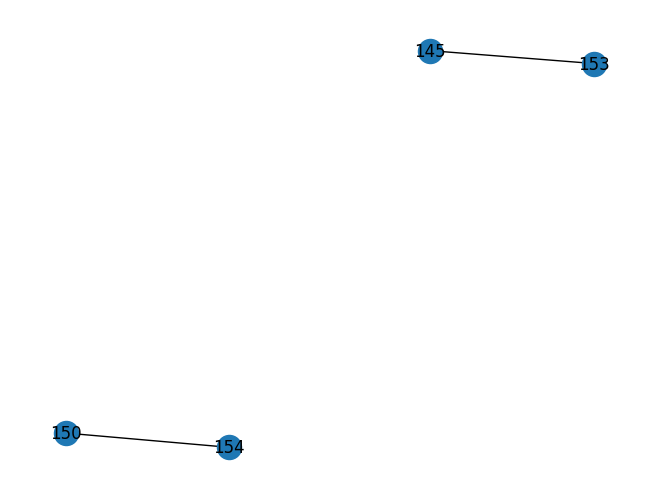

Performing node features query
Done with edge_df: 0.0006260871887207031
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  154      8.79   71.195089               0.912020   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000035                2                       False   
1              0.000029                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  154      8.79   71.195089               0.912020   

   synapse_density_diff  n_synapses_d

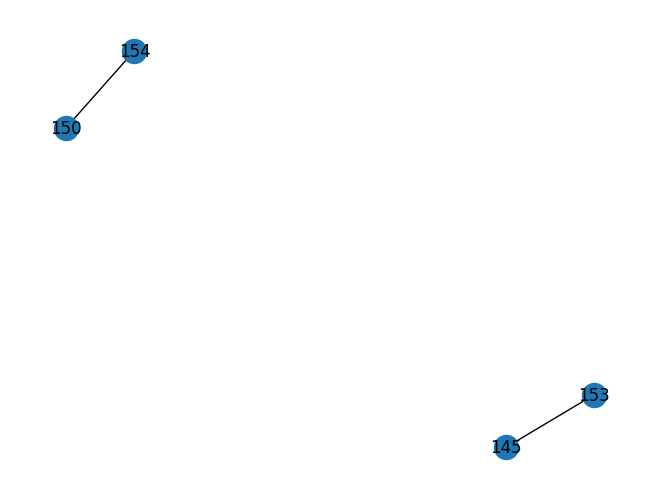

for upstream node 154, winning_node = 150, error_branches = [145 153]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (149.2582006666952) less than width_min(250)
Current node skip distance was 1490.1516303059093 but max skip distance was 1490.1516303059093
Current node skip distance was 2004.6812218672449 but max skip distance was 2300.0
Current node skip distance was 1518.173059474815 but max skip distance was 1518.173059474815
Current node skip distance was 1688.7729390052598 but max skip distance was 1688.7729390052598
Current node skip distance was 1660.1107849732643 but max skip distance was 1844.4074564846956
Current node skip distance was 1471.5851631431447 but max skip distance was 1506.3919036840553
Current node skip distance was 1537.8446294301966 but max skip distance was 1918.3362981869004
Current node skip distance was 1693.3042837882767 but max skip distance was 1693.3042837882767
Current node skip distance was 1918.3362981869004 but max skip dis

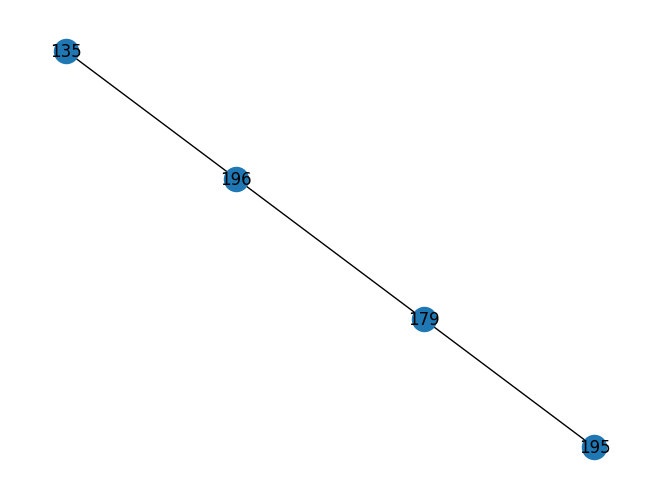

Performing global features query
Done with edge_df: 0.0006380081176757812
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   
2  196  179     64.03   12.284254               0.163567   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   
2              0.000000                0                       True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   

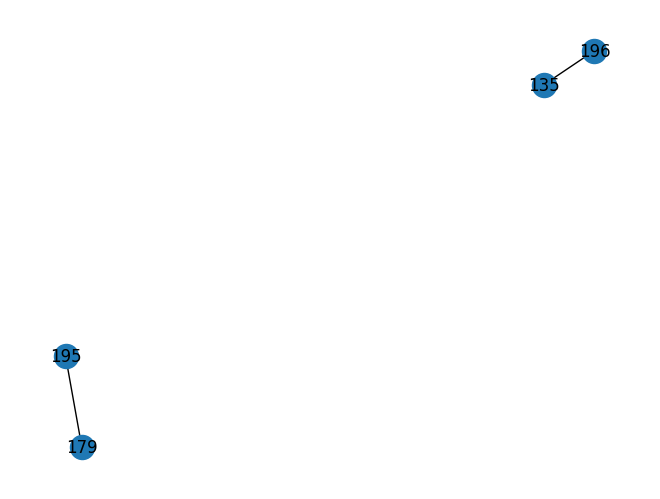

Performing node features query
Done with edge_df: 0.0006175041198730469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff

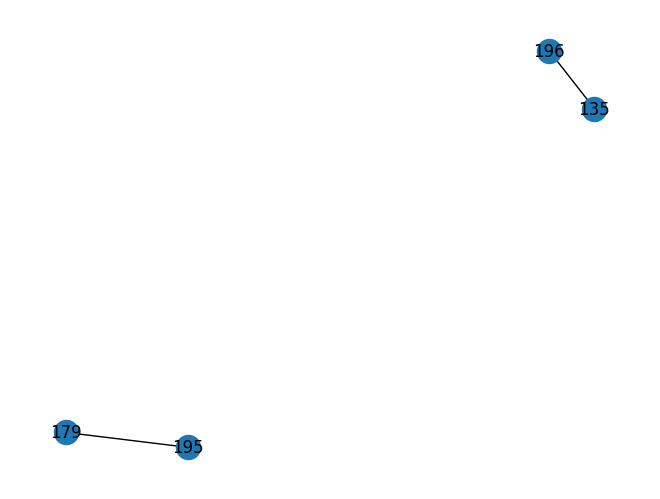

for upstream node 179, winning_node = 195, error_branches = [135 196]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (88.49933586232837) less than width_min(250)
Current node skip distance was 1469.3026492194927 but max skip distance was 1669.15941494473
Current node skip distance was 1965.8676252670189 but max skip distance was 1965.8676252670189
Current node skip distance was 2221.5294456190186 but max skip distance was 2221.5294456190186
Current node skip distance was 1585.4619287462306 but max skip distance was 1585.4619287462306
Current node skip distance was 1475.5326438941484 but max skip distance was 1475.5326438941484
Current node skip distance was 1437.1907798879654 but max skip distance was 1437.1907798879654
Current node skip distance was 1511.7277176739544 but max skip distance was 2103.191888344363
Current node skip distance was 1759.4129353208561 but max skip distance was 1759.4129353208561
Current node skip distance was 1471.4291591100111 but m

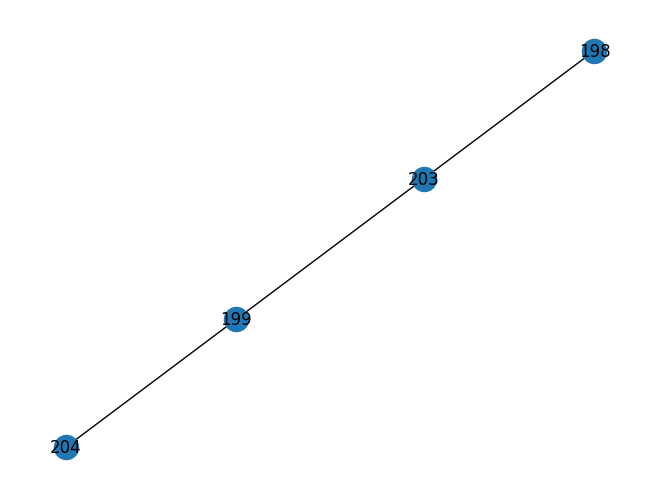

Performing global features query
Done with edge_df: 0.0008745193481445312
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   
2  199  203     59.48   80.831036               0.493954   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   
2              0.000144                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.51963

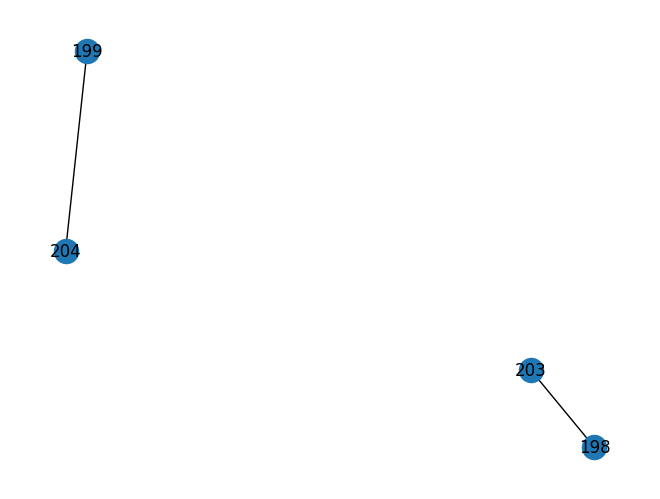

Performing node features query
Done with edge_df: 0.0008463859558105469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_d

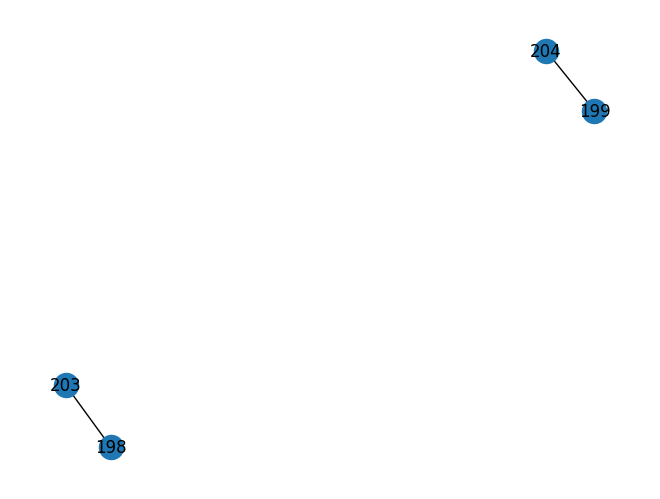

for upstream node 203, winning_node = 198, error_branches = [199 204]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (112.310866119622) less than width_min(250)
Current node skip distance was 1443.854790039841 but max skip distance was 1443.854790039841
Current node skip distance was 1506.252005449707 but max skip distance was 2300.0
Current node skip distance was 1798.2531760095058 but max skip distance was 1798.2531760095058
Current node skip distance was 1536.1693446150296 but max skip distance was 1536.1693446150296
Current node skip distance was 1780.4587744781402 but max skip distance was 1780.4587744781402
Current node skip distance was 1586.3248031064677 but max skip distance was 1586.3248031064677
Current node skip distance was 1850.7234789282606 but max skip distance was 1936.009738559324
Current node skip distance was 2000.1633805866811 but max skip distance was 2000.1633805866811
Current node skip distance was 1738.1594435644934 but max skip distan

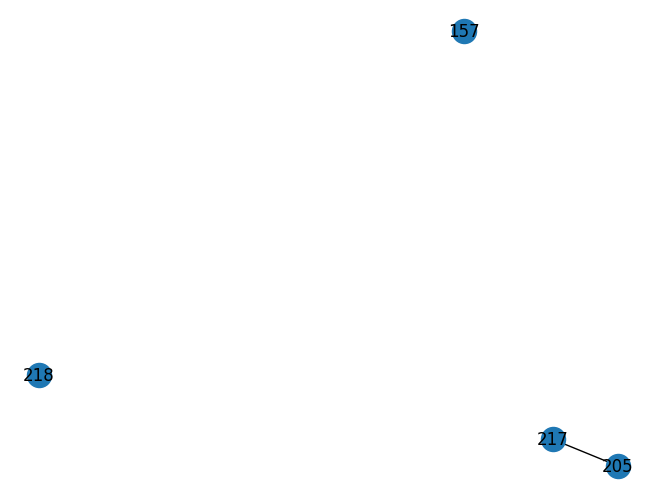

Performing global features query
Done with edge_df: 0.0005300045013427734
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  


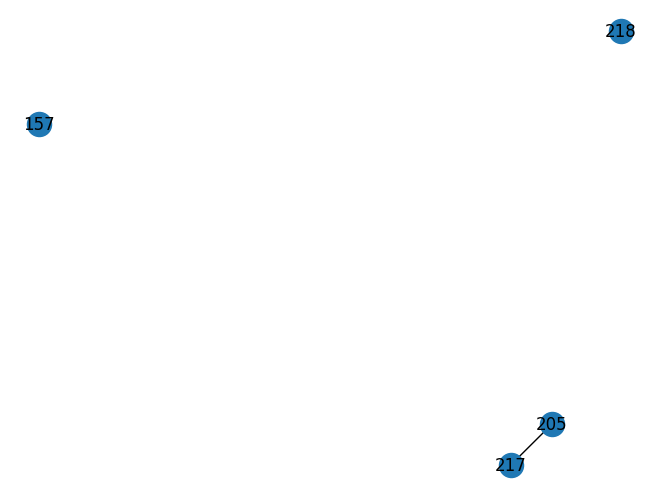

Performing node features query
Done with edge_df: 0.0006804466247558594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


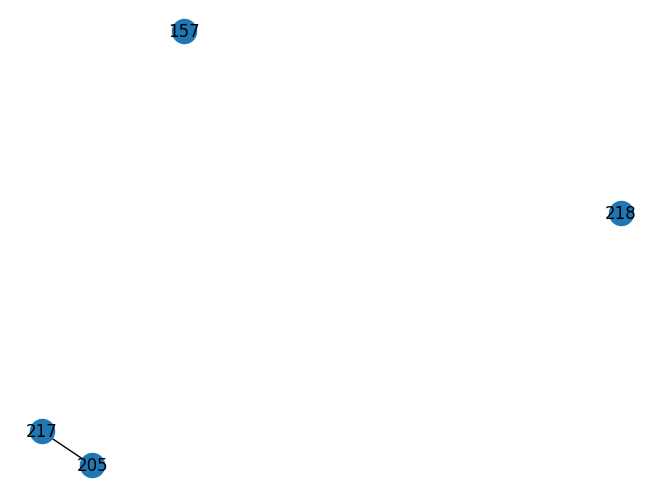

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1763.638744375726 but max skip distance was 1848.5035166199302
Current node skip distance was 1662.4847643852409 but max skip distance was 2212.423557991369
Current node skip distance was 1890.6324682050517 but max skip distance was 2111.109858522724
Current node skip distance was 1800.4908031559103 but max skip distance was 1800.4908031559103
Current node skip distance was 1840.188694984513 but max skip distance was 1840.188694984513
Current node skip distance was 1480.8555465104162 but max skip distance was 1840.188694984513
Current node skip distance was 1739.262976609458 but max skip distance was 1830.9796473087345
Current node skip distance was 1483.2831497367204 but max skip distance was 1739.262976609458
Current node skip distance was 1576.1513193155486 but max skip distance was 1576.1513193155486
Current node skip distance was 1814.7076670919237 but max skip d

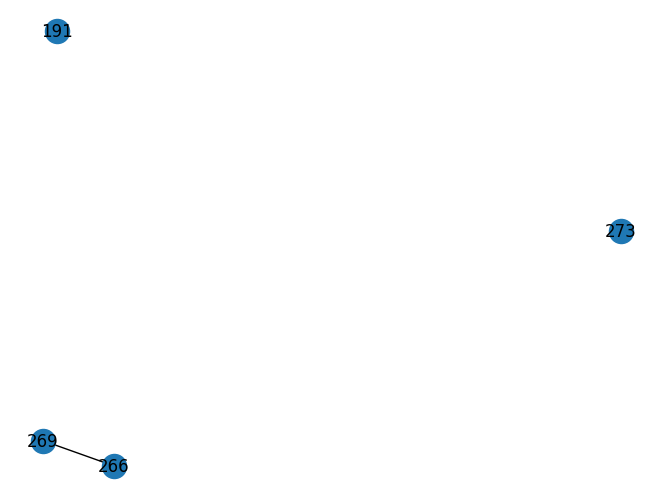

Performing global features query
Done with edge_df: 0.0005826950073242188
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete  
0                          None  


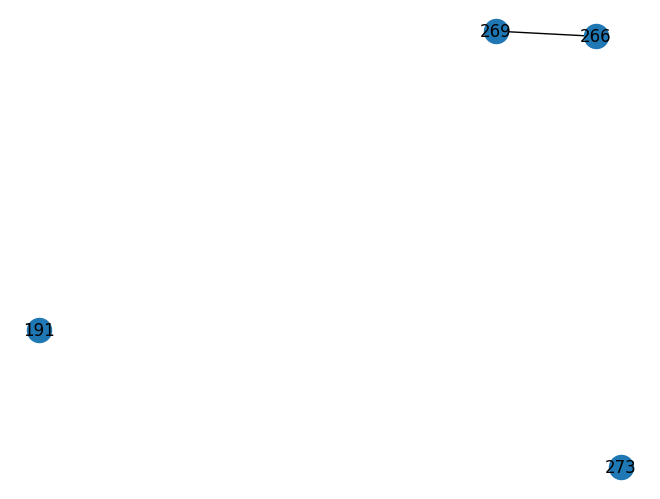

Performing node features query
Done with edge_df: 0.0007107257843017578
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000388                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


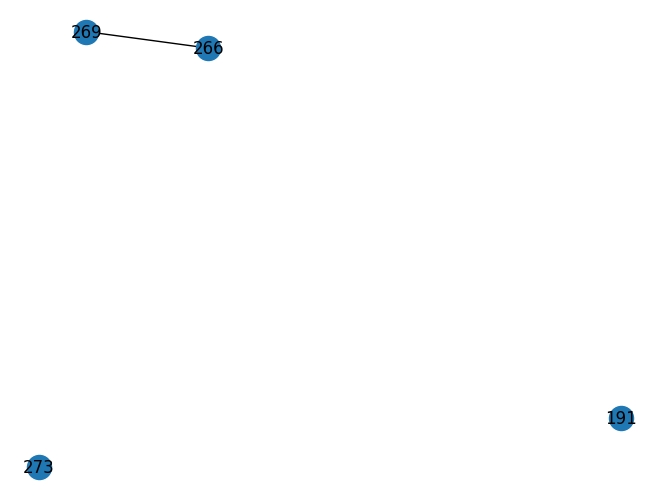

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2086.708888809626 but max skip distance was 2165.6546601796394
Current node skip distance was 2075.894362526472 but max skip distance was 2075.894362526472
Current node skip distance was 2165.6546601796394 but max skip distance was 2165.6546601796394
Current node skip distance was 1864.25330271235 but max skip distance was 1979.3255921928808
Current node skip distance was 1971.1845264032954 but max skip distance was 1971.1845264032954
Current node skip distance was 1700.2972194863037 but max skip distance was 2268.0388190222648
Current node skip distance was 1576.1216822004144 but max skip distance was 1876.3577250847513
Current node skip distance was 1967.3241716966195 but max skip distance was 2024.380261078134
Current node skip distance was 2298.921030871111 but max skip distance was 2298.921030871111
Current node skip distance was 1422.8191216850398 but max skip d

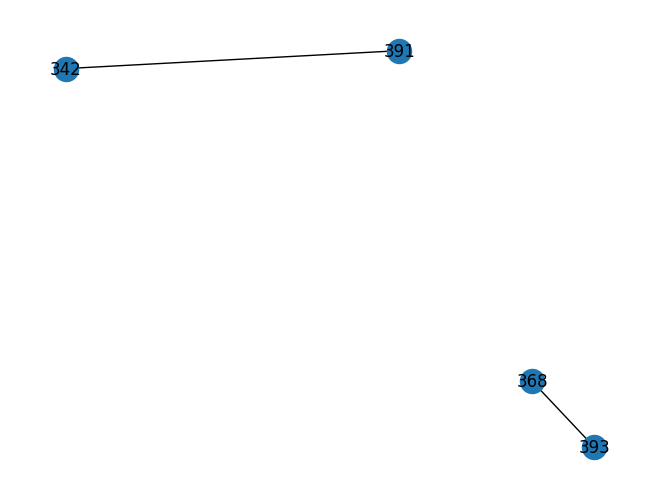

Performing global features query
Done with edge_df: 0.0005984306335449219
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056      

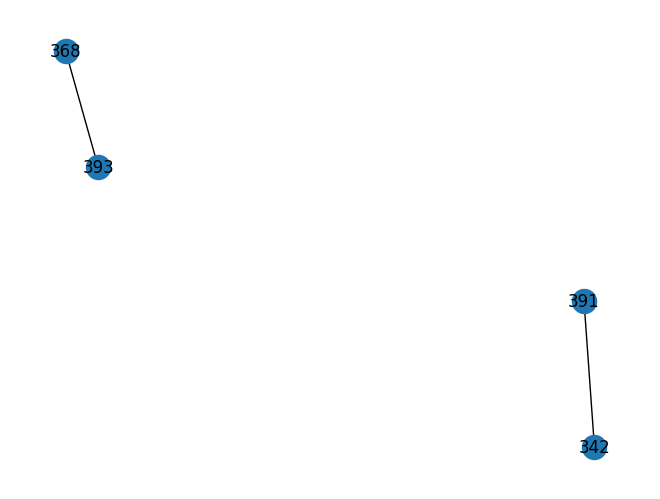

Performing node features query
Done with edge_df: 0.0006155967712402344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_d

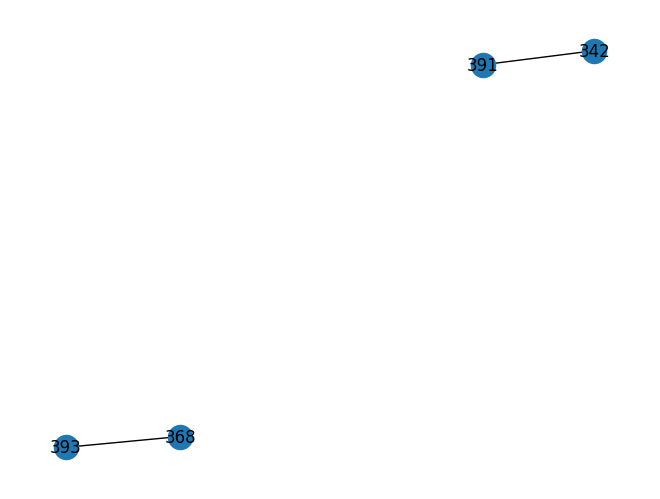

for upstream node 342, winning_node = 391, error_branches = [368 393]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (181.81578649690547) less than width_min(250)
Current node skip distance was 1857.9482625419403 but max skip distance was 1857.9482625419403
Current node skip distance was 2024.6107358289441 but max skip distance was 2045.7593757531026
Current node skip distance was 1723.0631465697677 but max skip distance was 2060.1060158328014
Current node skip distance was 1827.7906452133693 but max skip distance was 2226.881251855768
Current node skip distance was 1970.0153273419096 but max skip distance was 1970.0153273419096
Current node skip distance was 1820.6045623023558 but max skip distance was 1827.7906452133693
Current node skip distance was 2000.0150089779318 but max skip distance was 2296.284725981935
Current node skip distance was 1517.477557849377 but max skip distance was 2071.094277298478
branch_match_query = :
(((width_diff < 75) or (width_di

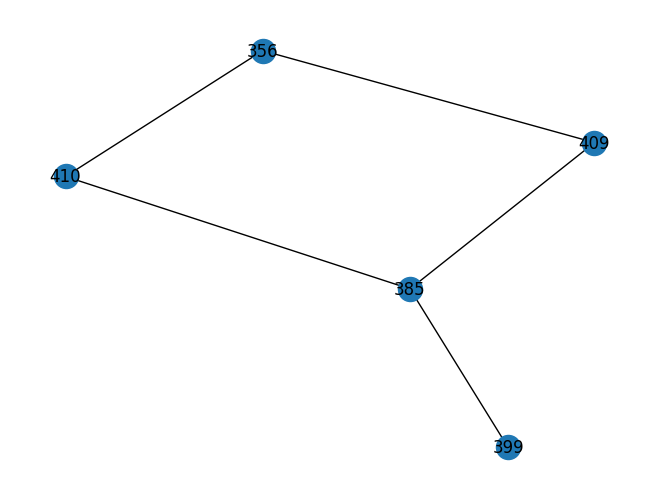

Performing global features query
Done with edge_df: 0.0006968975067138672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   14.061745               0.224164   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    7.403093               0.087928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_pa

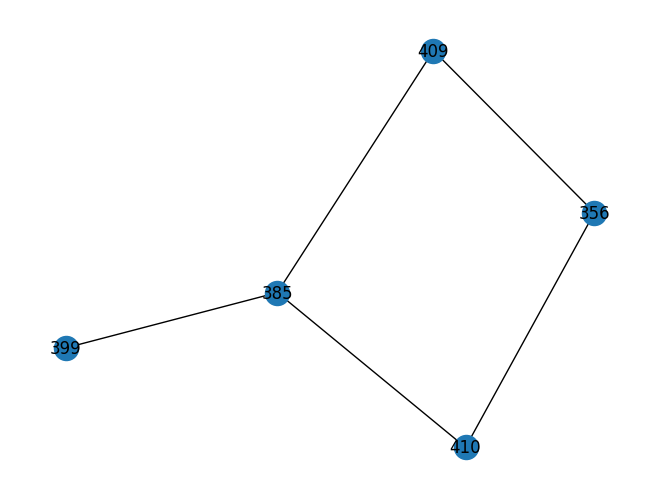

Performing node features query
Done with edge_df: 0.00079345703125
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   14.061745               0.224164   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    7.403093               0.087928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_partner_wid

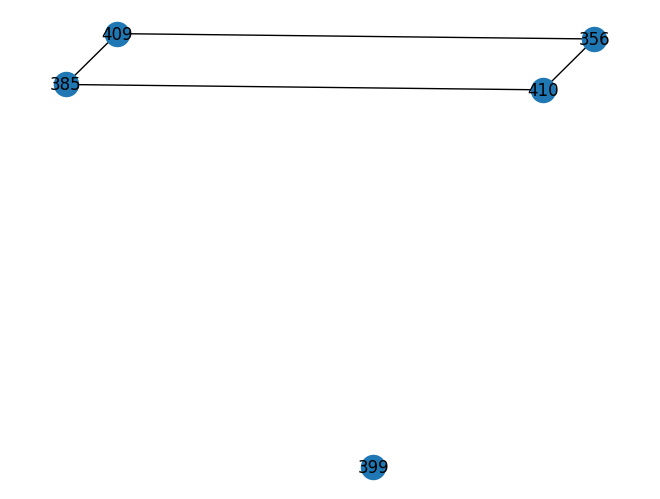

for upstream node 356, winning_node = None, error_branches = [385 399 409 410]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1403.4892971771471 but max skip distance was 1403.4892971771471
Current node skip distance was 1897.2302923052882 but max skip distance was 1897.2302923052882
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1675.991805202205 but max skip distance was 1675.991805202205
Current node skip distance was 1807.9329862391826 but max skip distance was 2300.0
Current node skip distance was 1429.9280946346803 but max skip distance was 1429.9280946346803
Current node skip distance was 1453.4280808679287 but max skip distance was 1453.4280808679287
Current node skip distance was 1475.9217580922184 but max skip distance was 2300.0
Current node skip distance was 1873.8585886753744 but max skip distance was 1873.8585886753744
Current node skip distance wa

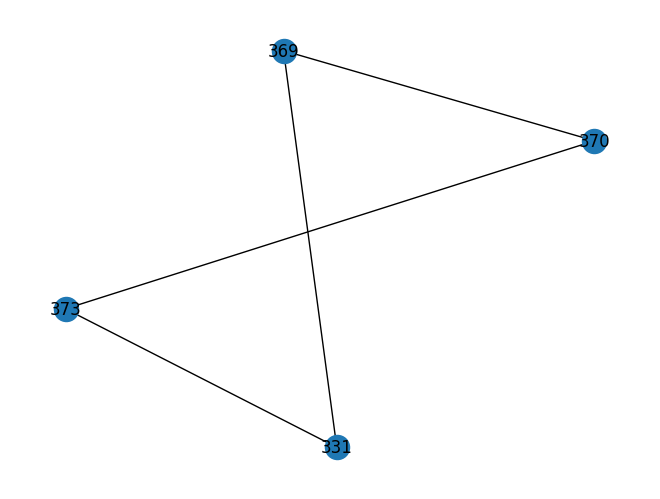

Performing global features query
Done with edge_df: 0.0005943775177001953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   21.873674               0.219519   
1  331  369     27.75    9.015642               0.082972   
2  370  373     38.61   17.647004               0.184946   
3  370  369     24.06   13.242312               0.121870   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

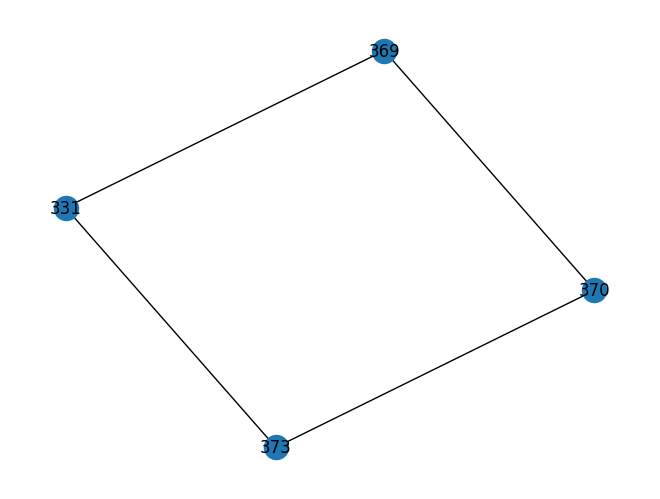

Performing node features query
Done with edge_df: 0.000629425048828125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   21.873674               0.219519   
1  331  369     27.75    9.015642               0.082972   
2  370  373     38.61   17.647004               0.184946   
3  370  369     24.06   13.242312               0.121870   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None    

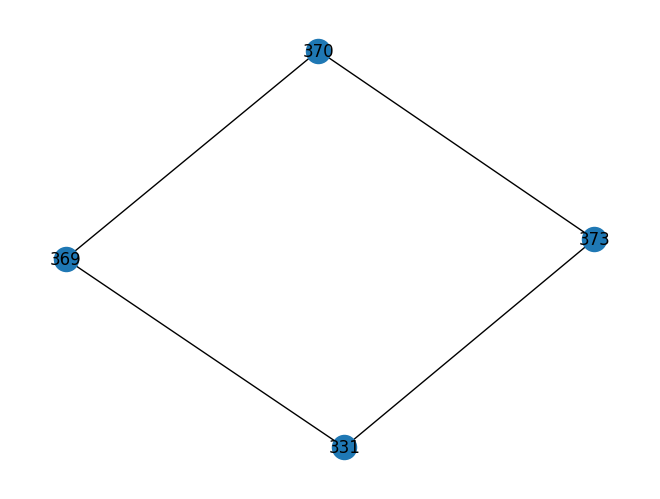

for upstream node 369, winning_node = None, error_branches = [331 370 373]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1888.297753476657 but max skip distance was 1888.297753476657
Current node skip distance was 1745.988538994956 but max skip distance was 1745.988538994956
Current node skip distance was 1490.708038892068 but max skip distance was 1499.7325270056906
Current node skip distance was 1558.385308835699 but max skip distance was 1745.988538994956
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008685588836669922
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  336     85.72   49.348361               0.635540   
1  332  372     78.

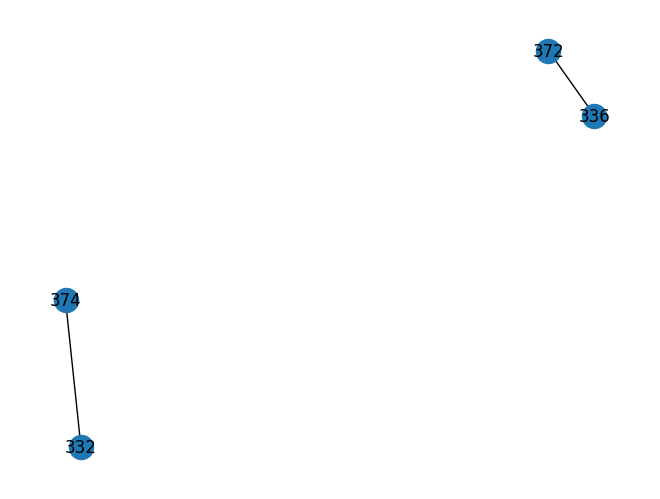

Performing global features query
Done with edge_df: 0.0005903244018554688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097     

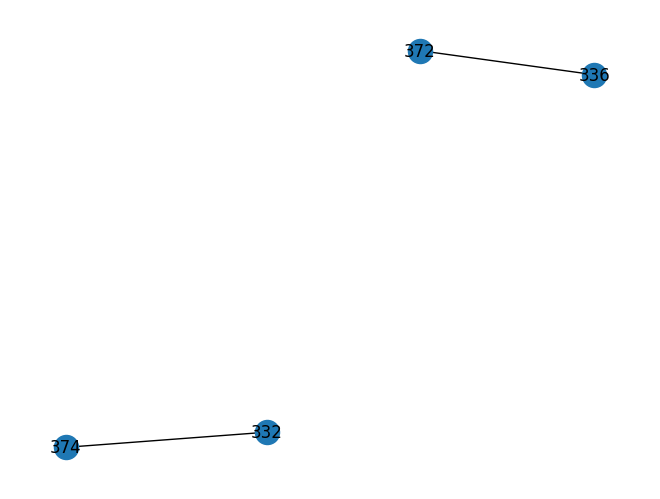

Performing node features query
Done with edge_df: 0.0006356239318847656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_d

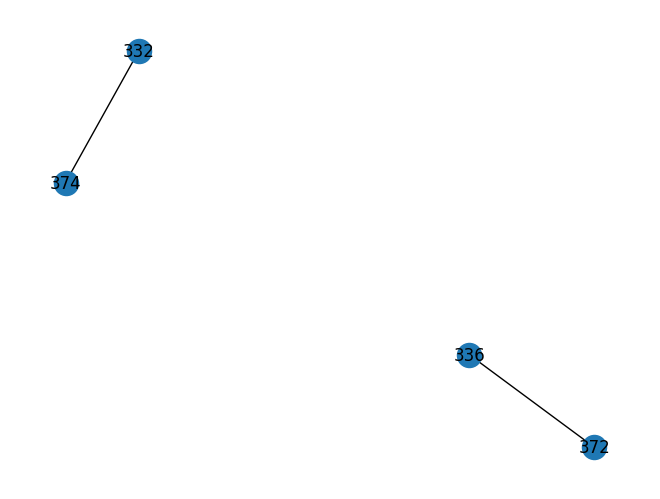

for upstream node 374, winning_node = 332, error_branches = [336 372]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (77.64796574259381) less than width_min(250)
Current node skip distance was 1824.259398723258 but max skip distance was 2221.475821813151
Current node skip distance was 2045.7593757531026 but max skip distance was 2045.7593757531026
Current node skip distance was 1932.4387404207182 but max skip distance was 1932.4387404207182
Current node skip distance was 2035.8375308575046 but max skip distance was 2035.8375308575046
Current node skip distance was 2025.6025728108746 but max skip distance was 2300.0
Current node skip distance was 1522.2879138865942 but max skip distance was 1586.8865547087983
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.003144979476928711
Performing Edge Query
After edge filter, # of rows = 3
Ex

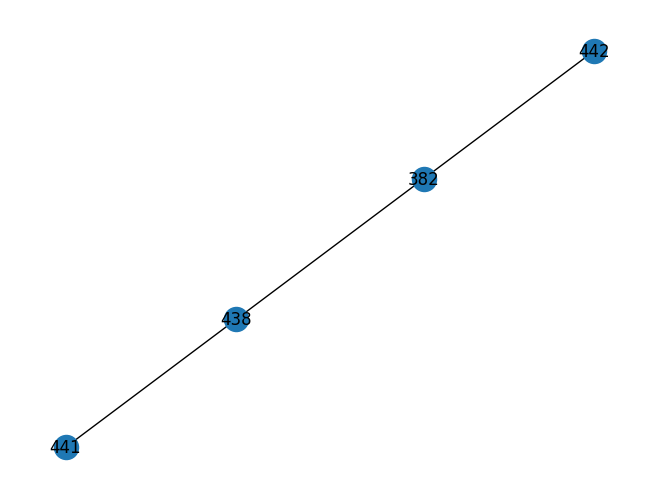

Performing global features query
Done with edge_df: 0.0008108615875244141
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.358747               0.170899   
1  438  382     46.16   18.884300               0.221260   
2  442  382     25.40   15.503674               0.181650   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000004                1                       True   
2              0.000049                3                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.358747               0.170899   

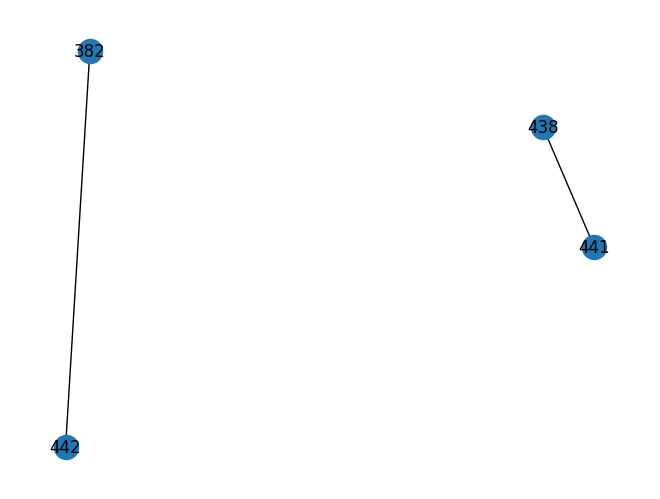

Performing node features query
Done with edge_df: 0.0007793903350830078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.358747               0.170899   
1  442  382     25.40   15.503674               0.181650   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000049                3                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.358747               0.170899   
1  442  382     25.40   15.503674               0.181650   

   synapse_density_diff  n_synapses_diff

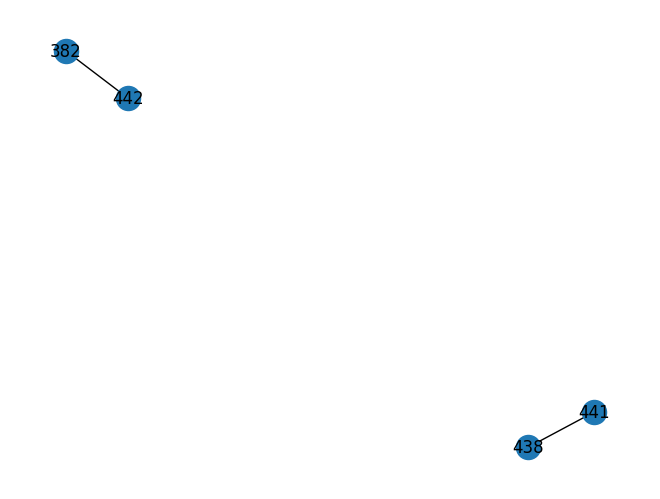

for upstream node 382, winning_node = 442, error_branches = [438 441]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (116.1121258385822) less than width_min(250)
Current node skip distance was 1497.6021475041161 but max skip distance was 1497.6021475041161
Current node skip distance was 1499.7325270056906 but max skip distance was 1499.7325270056906
Current node skip distance was 1428.0407321066473 but max skip distance was 1428.0407321066473
Current node skip distance was 1983.3865421239625 but max skip distance was 1983.3865421239625
Current node skip distance was 1906.784317756396 but max skip distance was 1906.784317756396
Current node skip distance was 1520.734350107465 but max skip distance was 1520.734350107465
Current node skip distance was 1924.2324437371053 but max skip distance was 1924.2324437371053
Current node skip distance was 1474.2135180112857 but max skip distance was 2291.195169928692
Current node skip distance was 1453.6175721877003 but max

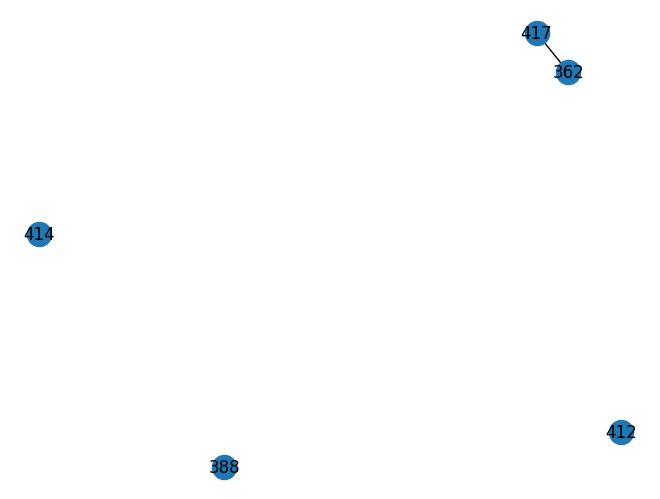

Performing global features query
Done with edge_df: 0.0006659030914306641
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  


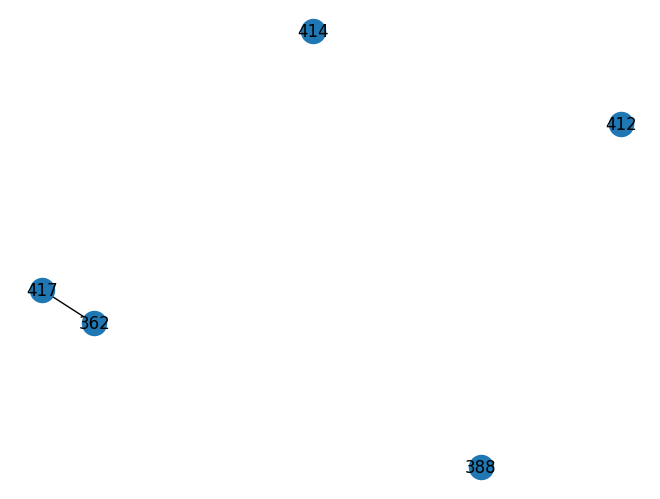

Performing node features query
Done with edge_df: 0.0006811618804931641
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


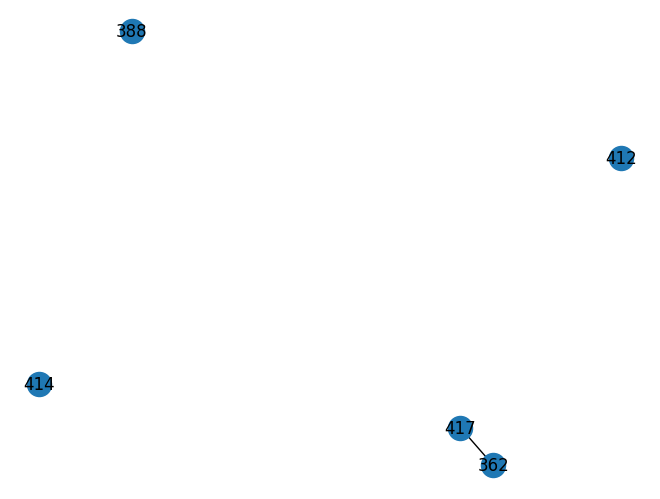

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1365.0532104748956 but max skip distance was 1493.7677241238655
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010313987731933594
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  414    106.83    4.824315               0.076355   
1  362  417      2.53   15.321511               0.242495   
2  362  413    121.33   15.569972               0.327013   
3  414  417     75.61   20.145826               0.345209   
4  414  413    106.02   10.745657               0.225689   
5  417  413     58.41   30.891483               0.648807   

   synapse_density_diff  n_synapses_diff  
0              0.000068     

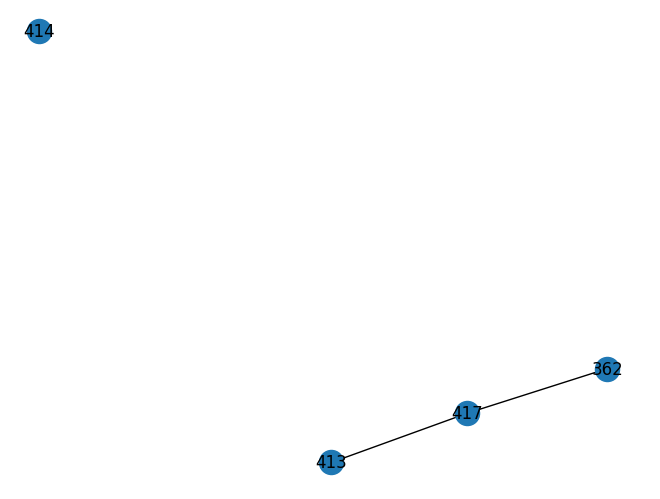

Performing global features query
Done with edge_df: 0.0005850791931152344
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   
1  417  413     58.41   30.891483               0.648807   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   
1              0.000051                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_part

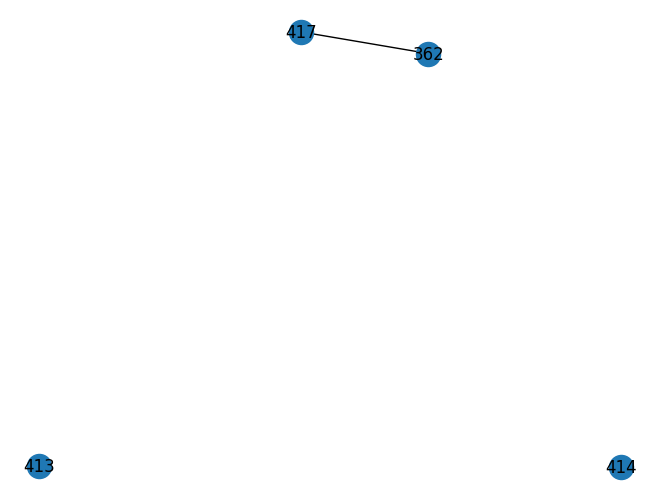

Performing node features query
Done with edge_df: 0.0007846355438232422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.321511               0.242495   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


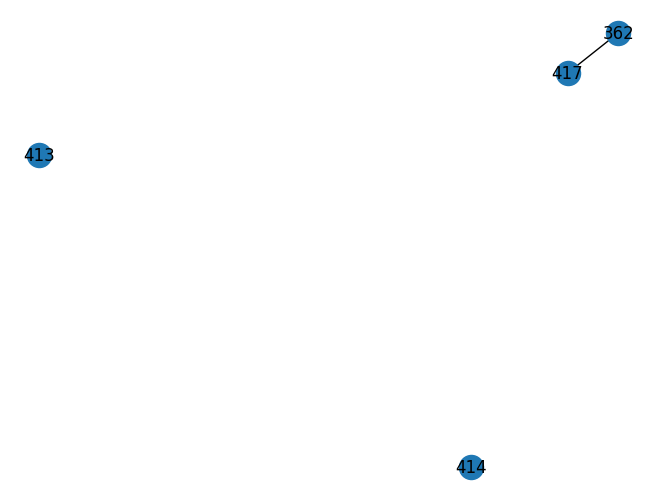

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1409.826781900253 but max skip distance was 1639.187748606012
Current node skip distance was 2019.0862723530136 but max skip distance was 2205.7736735784565
Current node skip distance was 1493.7677241238655 but max skip distance was 1493.7677241238655
Current node skip distance was 1924.1272064866089 but max skip distance was 1987.3139138809427
Current node skip distance was 1797.726209129479 but max skip distance was 2222.579722388221
Current node skip distance was 1630.400896025443 but max skip distance was 1924.1272064866089
Current node skip distance was 1934.1064544048495 but max skip distance was 2019.0862723530136
Current node skip distance was 1543.0186166671774 but max skip distance was 1543.0186166671774
Current node skip distance was 1424.7536385843455 but max skip distance was 1424.7536385843455
Current node skip distance was 1892.3149310140766 but max ski

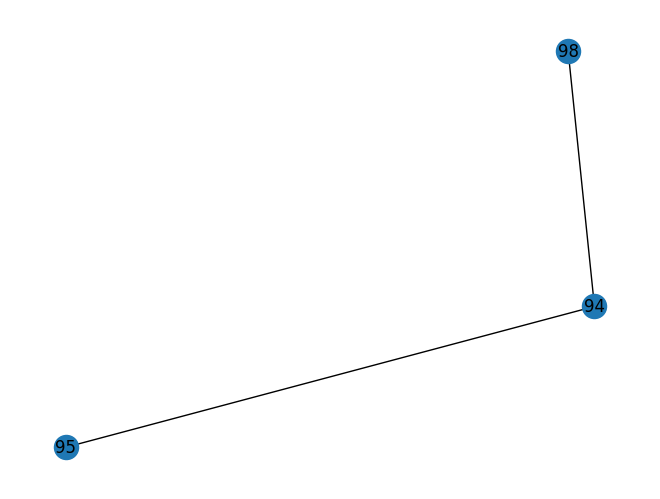

Performing global features query
Done with edge_df: 0.0006685256958007812
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  94  95     37.32   26.296700               0.234323              0.000029   
1  94  98     13.82   34.216557               0.438632              0.000213   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  
1                4                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  94  95     37.32   26.296700               0.234323              0.000029   
1  94  98     13.82   34.216557               0.438632              0.000213   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

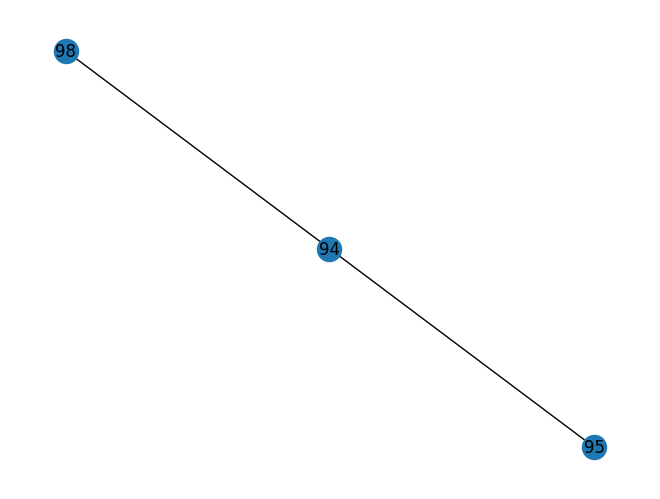

for upstream node 98, winning_node = None, error_branches = [94 95]
98 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008544921875
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  213  222     17.50   23.310146               0.214525   
1  213  194    146.30   57.248338               0.345062   
2  222  194     47.35   80.558484               0.485562   

   synapse_density_diff  n_synapses_diff  
0              0.000089                3  
1              0.000387                5  
2              0.000476                2  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  213  222     17.50   23.310146               0.214525   
1  222  194     47.35

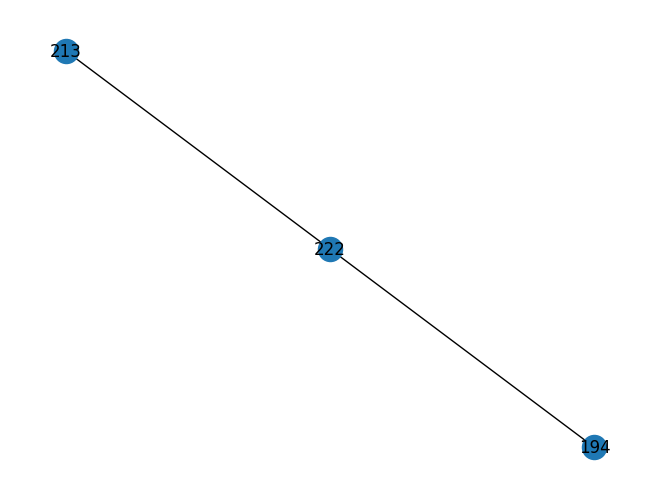

Performing global features query
Done with edge_df: 0.0008156299591064453
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  213  222     17.50   23.310146               0.214525   
1  222  194     47.35   80.558484               0.485562   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   
1              0.000476                2                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  213  222      17.5   23.310146               0.214525   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   

  definite_part

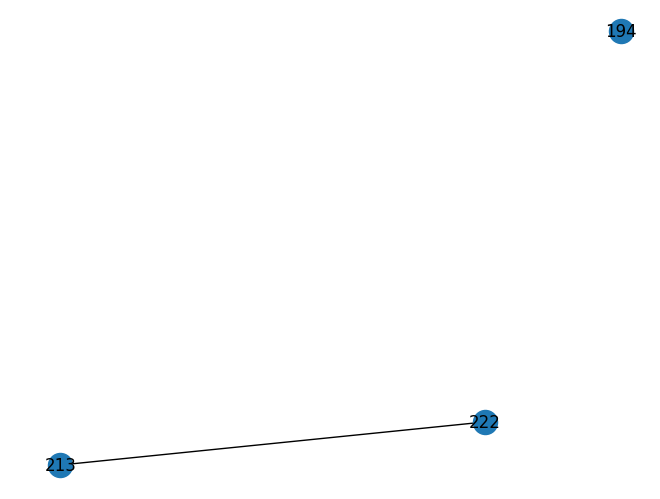

194 triggered axon_double_back_inh_filter
limb_branch_dict_to_cancel = {'L0': array([225, 228, 264, 265, 266, 267, 214, 184,  81, 100, 101,  73,  79,
        80,  83,  84,  86,  87,  90,  91,  93,  85,  88,  94,  95, 213,
       222])}
width_max = 500
upstream_width_max = 500
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
N_branches on limbs before simplification
L0: 244
L1: 14
L2: 15
L3: 11
L4: 11
L5: 5
L6: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 244 (difference of 0)
L1: 14 (difference of 0)
L2: 15 (difference of 0)
L3: 11 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----



---N_branches on limbs AFTER combine_path_branches---
L0: 240 (difference of 4)
L1: 13 (difference of 1)
L2: 15 (difference of 0)
L3: 11 (difference of 0)
L4: 11 (diff

In [49]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [50]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,z
)

[autoreload of neurd.synapse_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/neurd_packages/NEURD/neurd/synapse_utils.py", line 4153
    coordinates_nm = coordinates_nm,
    ^
SyntaxError: keyword argument repeated
]


No skeletons to stack so returning empty list
No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 11.26, 'soma_angle_min': 11.26}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 6, 'soma_angle_max': 154.87, 'soma_angle_min': 24.77}


# Saving off the autoproofread neuron

In [58]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [59]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

hi
Total time for soma meshes compression = 0.5298817157745361
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.2971682548522949
Total time for limb_meshes compression = 1.314457654953003
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 26.24773120880127
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140213052423472
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140213317491056
Total time for compression = 85.84691548347473


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135567721964_auto_proof---


'864691135567721964_auto_proof.pbz2'

# Plotting the final neuron

In [53]:
from neurd import synapse_utils as syu

In [ ]:
synapse_df = syu.synapse_df(neuron_obj_proof)
synapse_df

In [ ]:
from python_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [54]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

# of error synapses = 414

 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [51]:
nviz.plot_compartments(neuron_obj_proof)

[autoreload of neurd.synapse_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/neurd_packages/NEURD/neurd/synapse_utils.py", line 4165
    ["synapse_id"] + syn_coord_names + ['synapse_size]
                                                     ^



 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green
